In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
%matplotlib qt
# %matplotlib osx


sns.set_style("whitegrid")
sns.set_style("ticks")
from datetime import datetime
str(datetime.now())




'2018-10-14 17:48:10.279114'

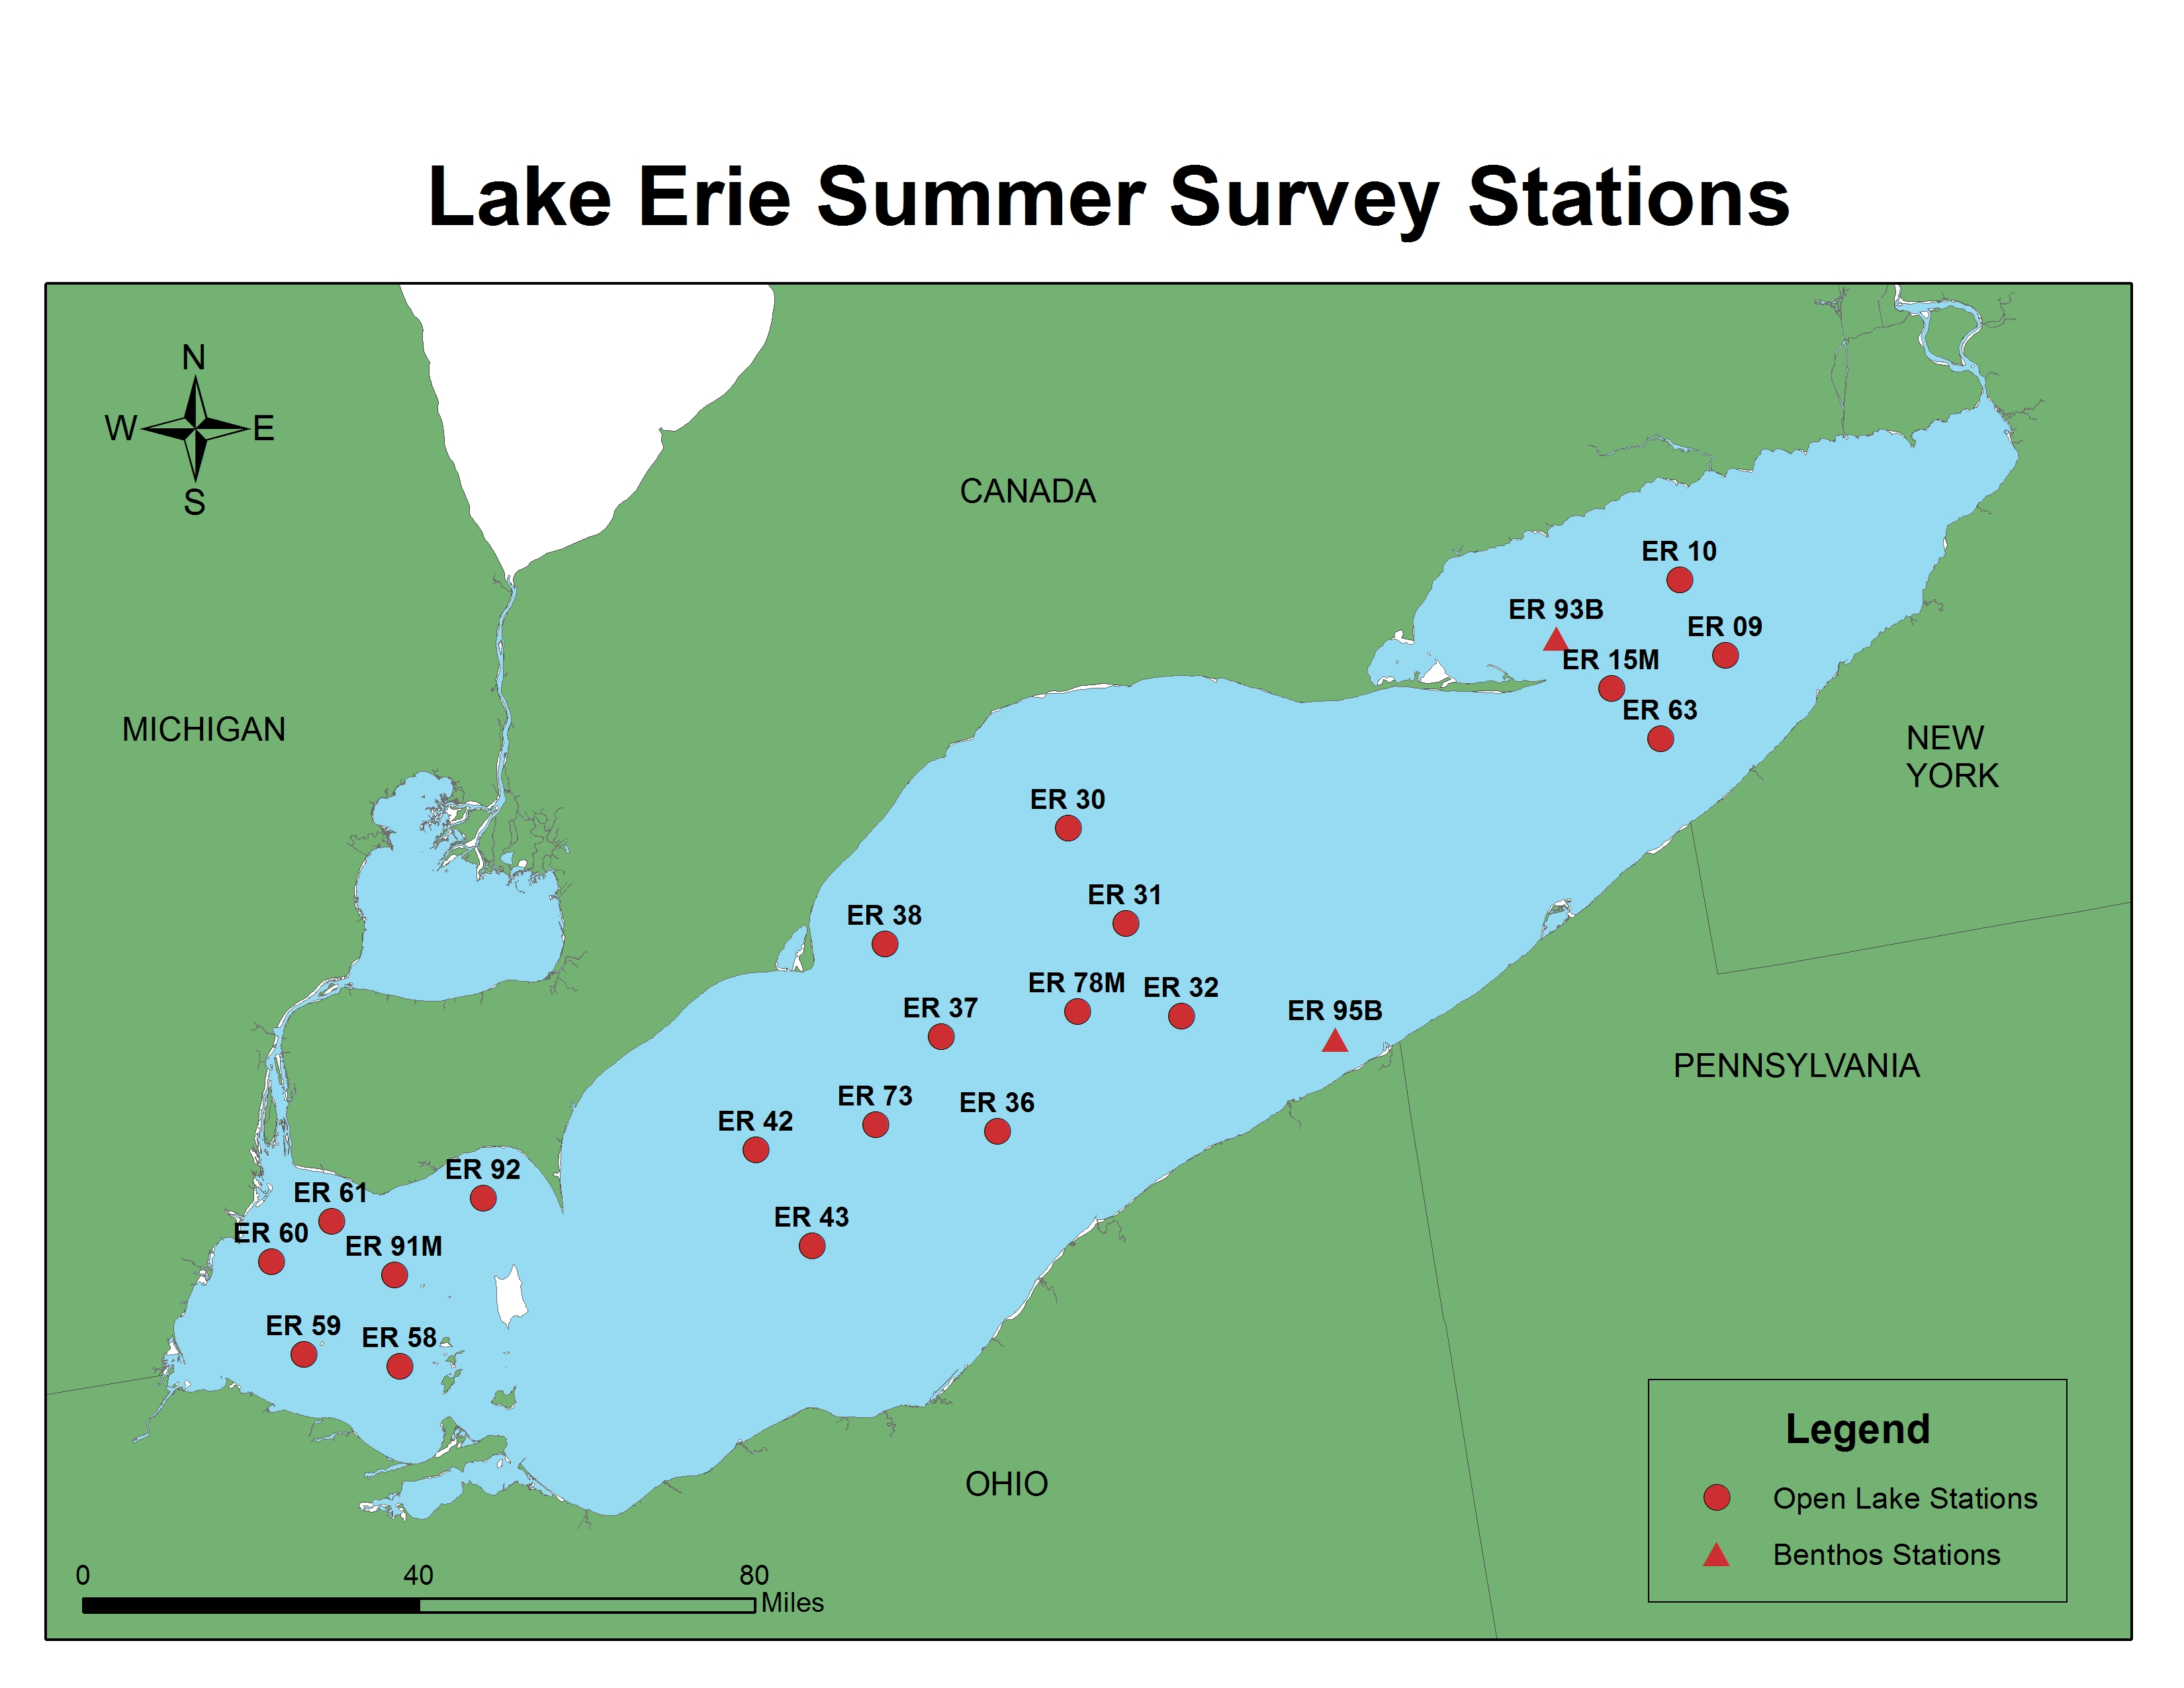

In [2]:
from IPython.display import Image
Image(filename='../../measurements/GLNPO/Erie_Summer_Survey2017.jpg') 

In [3]:
Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/Cl.csv')
Cl = Cl[Cl.QC_TYPE=='routine field sample']

In [4]:
eastern_basin = ['ER15M', 'ER09', 'ER63', 'ER10']
central_basin = ['ER78M', 'ER38', 'ER37', 'ER42', 'ER30', 'ER73', 'ER36', 'ER32', 'ER43','ER31', ]
western_basin = ['ER58', 'ER59', 'ER61', 'ER60', 'ER92', 'ER91M']

In [5]:
Cl[Cl.YEAR>1999].groupby(['STATION_ID']).count().sort_values(['Row'],ascending=False)

Row  YEAR  MONTH  SEASON  LAKE  CRUISE_ID  VISIT_ID  STN_DEPTH_M  \
STATION_ID                                                                     
ER15M       352   352    352     352   352        352       352          352   
ER78M       229   229    229     229   229        229       229          229   
ER09        206   206    206     206   206        206       206          206   
ER63        202   202    202     202   202        202       202          202   
ER10        198   198    198     198   198        198       198          198   
ER38        179   179    179     179   179        179       179          179   
ER37        171   171    171     171   171        171       171          171   
ER42        171   171    171     171   171        171       171          171   
ER30        170   170    170     170   170        170       170          170   
ER73        170   170    170     170   170        170       170          170   
ER36        169   169    169     169   169        169       169          169   
ER32        168   168    168     168   168        168       168          168   
ER43        168   168    168     168   168        168       168          168   
ER31        166   166    166     166   166        166       166          166   
ER58        156   156    156     156   156        156       156          156   
ER61        156   156    156     156   156        156       156          156   
ER59        152   152    152     152   152        152       152          152   
ER92        152   152    152     152   152        152       152          152   
ER91M       151   151    151     151   151        151       151          151   
ER60        148   148    148     148   148        148       148          148   
ERFO         51    51     51      51    51         51        51           51   
ERFE         47    47     47      47    47         47        47           47   

            LATITUDE  LONGITUDE     ...       METHOD_1  RESULT_REMARK_1  \
STATION_ID                          ...                                   
ER15M            352        352     ...            352                0   
ER78M            229        229     ...            229               10   
ER09             206        206     ...            206                0   
ER63             202        202     ...            202                0   
ER10             198        198     ...            198                1   
ER38             179        179     ...            179                6   
ER37             171        171     ...            171                5   
ER42             171        171     ...            171                6   
ER30             170        170     ...            170                6   
ER73             170        170     ...            170                6   
ER36             169        169     ...            169                5   
ER32             168        168     ...            168                6   
ER43             168        168     ...            168                6   
ER31             166        166     ...            166                6   
ER58             156        156     ...            156                0   
ER61             156        156     ...            156                0   
ER59             152        152     ...            152                0   
ER92             152        152     ...            152                4   
ER91M            151        151     ...            151                0   
ER60             148        148     ...            148                0   
ERFO              51         51     ...             51                0   
ERFE              47         47     ...             47                0   

            ANL_CODE_2  ANALYTE_2  VALUE_2  UNITS_2  FRACTION_2  METHOD_2  \
STATION_ID                                                                  
ER15M                0          0        0        0           0         0   
ER78M                0          0        0        0        

In [6]:
stations = eastern_basin + central_basin + western_basin
years = range(2003,2018)
seasons = ['Spring', 'Summer']

In [7]:
Cl = Cl[Cl['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
Cl = Cl[Cl['SEASON'].isin(seasons)]
Cl['VALUE_1'] = pd.to_numeric(Cl['VALUE_1'], errors='coerce')

In [8]:
Cl = Cl.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()

In [9]:
Cl[(Cl.YEAR==2011) & (Cl.STATION_ID=='ER15M') & (Cl.SEASON=='Spring')]

STATION_ID  YEAR  SEASON  SAMPLE_DEPTH_M  VALUE_1
1309      ER15M  2011  Spring             2.0    6.993
1310      ER15M  2011  Spring             4.9    7.009
1311      ER15M  2011  Spring            10.0    7.016
1312      ER15M  2011  Spring            20.0    7.020
1313      ER15M  2011  Spring            30.1    7.065
1314      ER15M  2011  Spring            40.1    7.015
1315      ER15M  2011  Spring            52.2    7.011
1316      ER15M  2011  Spring            61.1    7.017

In [10]:
Cl = Cl.drop(Cl[(Cl.YEAR==2011) & (Cl.STATION_ID=='ER15M') & (Cl.SEASON=='Spring')].index)

In [11]:
Cl[Cl.YEAR>1999].groupby(['STATION_ID','SEASON']).describe()['VALUE_1'].applymap('{:.1f}'.format)

count  mean  std   min   25%   50%   75%   max
STATION_ID SEASON                                                
ER09       Spring   88.0  16.8  2.6   7.0  16.5  17.2  18.1  19.5
           Summer   97.0  17.4  0.9  15.6  16.9  17.3  18.0  19.7
ER10       Spring   87.0  17.0  2.7   6.9  16.6  17.6  18.2  19.8
           Summer   90.0  17.4  1.3   9.1  16.8  17.4  18.2  19.9
ER15M      Spring  153.0  17.4  0.8  15.6  16.9  17.5  18.1  18.4
           Summer  153.0  17.4  0.9  14.8  16.8  17.6  18.0  19.6
ER30       Spring   66.0  16.7  0.8  15.0  16.1  16.6  17.5  18.0
           Summer   81.0  16.5  0.8  14.7  15.9  16.6  17.0  18.3
ER31       Spring   63.0  16.5  0.9  14.9  15.9  16.4  17.1  18.1
           Summer   76.0  16.4  0.9  15.0  15.9  16.5  16.8  19.2
ER32       Spring   65.0  17.2  1.9  14.0  16.0  16.8  18.4  22.0
           Summer   81.0  16.4  1.1  13.1  16.0  16.5  17.3  18.1
ER36       Spring   67.0  16.9  1.8  14.2  16.0  16.5  17.4  23.5
           Summer   80.0  16.5  2.0   0.6  16.1  16.7  17.2  20.2
ER37       Spring   68.0  16.6  0.9  13.7  16.1  16.5  17.4  17.9
           Summer   83.0  16.5  0.9  14.9  15.8  16.5  17.1  18.2
ER38       Spring   61.0  16.7  0.9  15.2  16.1  16.4  17.4  18.5
           Summer   90.0  16.3  0.9  14.4  15.5  16.3  16.8  18.3
ER42       Spring   67.0  16.4  1.1  13.1  15.9  16.3  17.3  17.8
           Summer   82.0  16.5  1.0  13.9  15.9  16.6  17.1  18.1
ER43       Spring   64.0  16.3  1.5  11.8  15.6  16.5  17.2  19.1
           Summer   79.0  16.9  1.0  15.0  16.2  17.1  17.5  19.5
ER58       Spring   70.0  17.9  4.8  12.9  13.7  16.3  21.4  28.9
           Summer   62.0  14.5  1.1  12.6  13.7  14.3  14.9  16.8
ER59       Spring   67.0  18.7  7.2  10.6  13.0  16.3  22.4  38.5
           Summer   62.0  13.2  1.9   9.9  12.0  12.8  14.4  18.1
ER60       Spring   65.0  14.4  5.1   8.2  10.0  13.9  16.4  26.6
           Summer   62.0  11.7  2.6   8.6   9.3  11.1  13.6  17.0
ER61       Spring   70.0  14.1  7.4   8.2   8.9  13.3  14.2  50.5
           Summer   61.0   9.3  1.1   7.7   8.2   9.3  10.1  11.1
ER63       Spring   82.0  16.8  2.4   7.0  16.8  17.4  18.0  18.6
           Summer   93.0  17.3  0.8  15.5  16.7  17.3  17.9  18.9
ER73       Spring   66.0  16.6  1.1  14.8  16.0  16.5  17.2  19.7
           Summer   82.0  16.6  1.0  15.1  15.8  16.6  17.1  19.6
ER78M      Spring   86.0  16.6  1.1  14.5  16.2  16.6  17.1  19.1
           Summer  113.0  16.5  0.9  12.6  16.0  16.5  17.0  18.9
ER91M      Spring   67.0  15.9  5.1   9.4  12.1  14.1  20.1  26.2
           Summer   63.0  11.5  2.0   8.8  10.2  10.9  12.2  17.3
ER92       Spring   69.0  15.9  2.7  12.4  13.9  14.7  17.3  24.6
           Summer   62.0  11.8  1.2   9.2  10.9  11.7  12.8  14.3

In [19]:
# %matplotlib notebook
# %matplotlib
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for k, s in enumerate(seasons):
        for i, st in enumerate(stations):
            if st in eastern_basin:
                i=2
            if st in central_basin:
                i=1
            if st in western_basin:
                i=0

            data = Cl[(Cl['STATION_ID']==st) & 
                      (Cl['YEAR']==y) &
                    (Cl['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
                marker = 'x'
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
                marker = 'o'
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, s=20, marker=marker, label=st)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, lw=0.3, label='')
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend()
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Chloride concnetrations, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# plt.draw()
# f.savefig('Mass Balance/GLENDA/Chloride_mgL_0_30.pdf')

Text(8.5,-0.2,'Chloride concnetrations, [$mg$ $L^{-1}$]')

In [18]:
# %matplotlib notebook
# %matplotlib
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for i, st in enumerate(stations):
    if st in eastern_basin:
        i=2
    if st in central_basin:
        i=1
    if st in western_basin:
        i=0
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Cl[(Cl['STATION_ID']==st) & 
                      (Cl['YEAR']==y) &
                    (Cl['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, s=5)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, lw=0.3)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Chloride concnetrations, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# plt.draw()
# f.savefig('Mass Balance/GLENDA/Chloride_mgL_0_30.pdf')

Text(8.5,-0.2,'Chloride concnetrations, [$mg$ $L^{-1}$]')

In [52]:
Temp = pd.read_csv('../../measurements/GLNPO/Mass Balance/Temp.csv')
Temp = Temp[Temp.QC_TYPE=='routine field sample']
Temp = Temp[Temp['STATION_ID'].isin(stations)]
Temp = Temp[Temp['STATION_ID'].isin(stations)]
Temp = Temp[Temp['SEASON'].isin(seasons)]
Temp['VALUE_1'] = pd.to_numeric(Temp['VALUE_1'], errors='coerce')
Temp = Temp[Temp['VALUE_1']>0.1]
Temp = Temp.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()

In [54]:
# %matplotlib notebook
# %matplotlib
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for i, st in enumerate(stations):
    if st in eastern_basin:
        i=2
    if st in central_basin:
        i=1
    if st in western_basin:
        i=0
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Temp[(Temp['STATION_ID']==st) & 
                      (Temp['YEAR']==y) &
                    (Temp['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, s=5)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, lw=0.3)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Temperature, [C]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# plt.draw()
# f.savefig('Mass Balance/GLENDA/Chloride_mgL_0_30.pdf')

Text(8.5,-0.2,'Temperature, [C]')

In [58]:
Alk = pd.read_csv('../../measurements/GLNPO/Mass Balance/Alk.csv')
Alk = Alk[Alk.QC_TYPE=='routine field sample']
Alk = Alk[Alk['STATION_ID'].isin(stations)]
Alk = Alk[Alk['SEASON'].isin(seasons)]
Alk['VALUE_1'] = pd.to_numeric(Alk['VALUE_1'], errors='coerce')
Alk = Alk[Alk['VALUE_1']>50]
Alk = Alk.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()

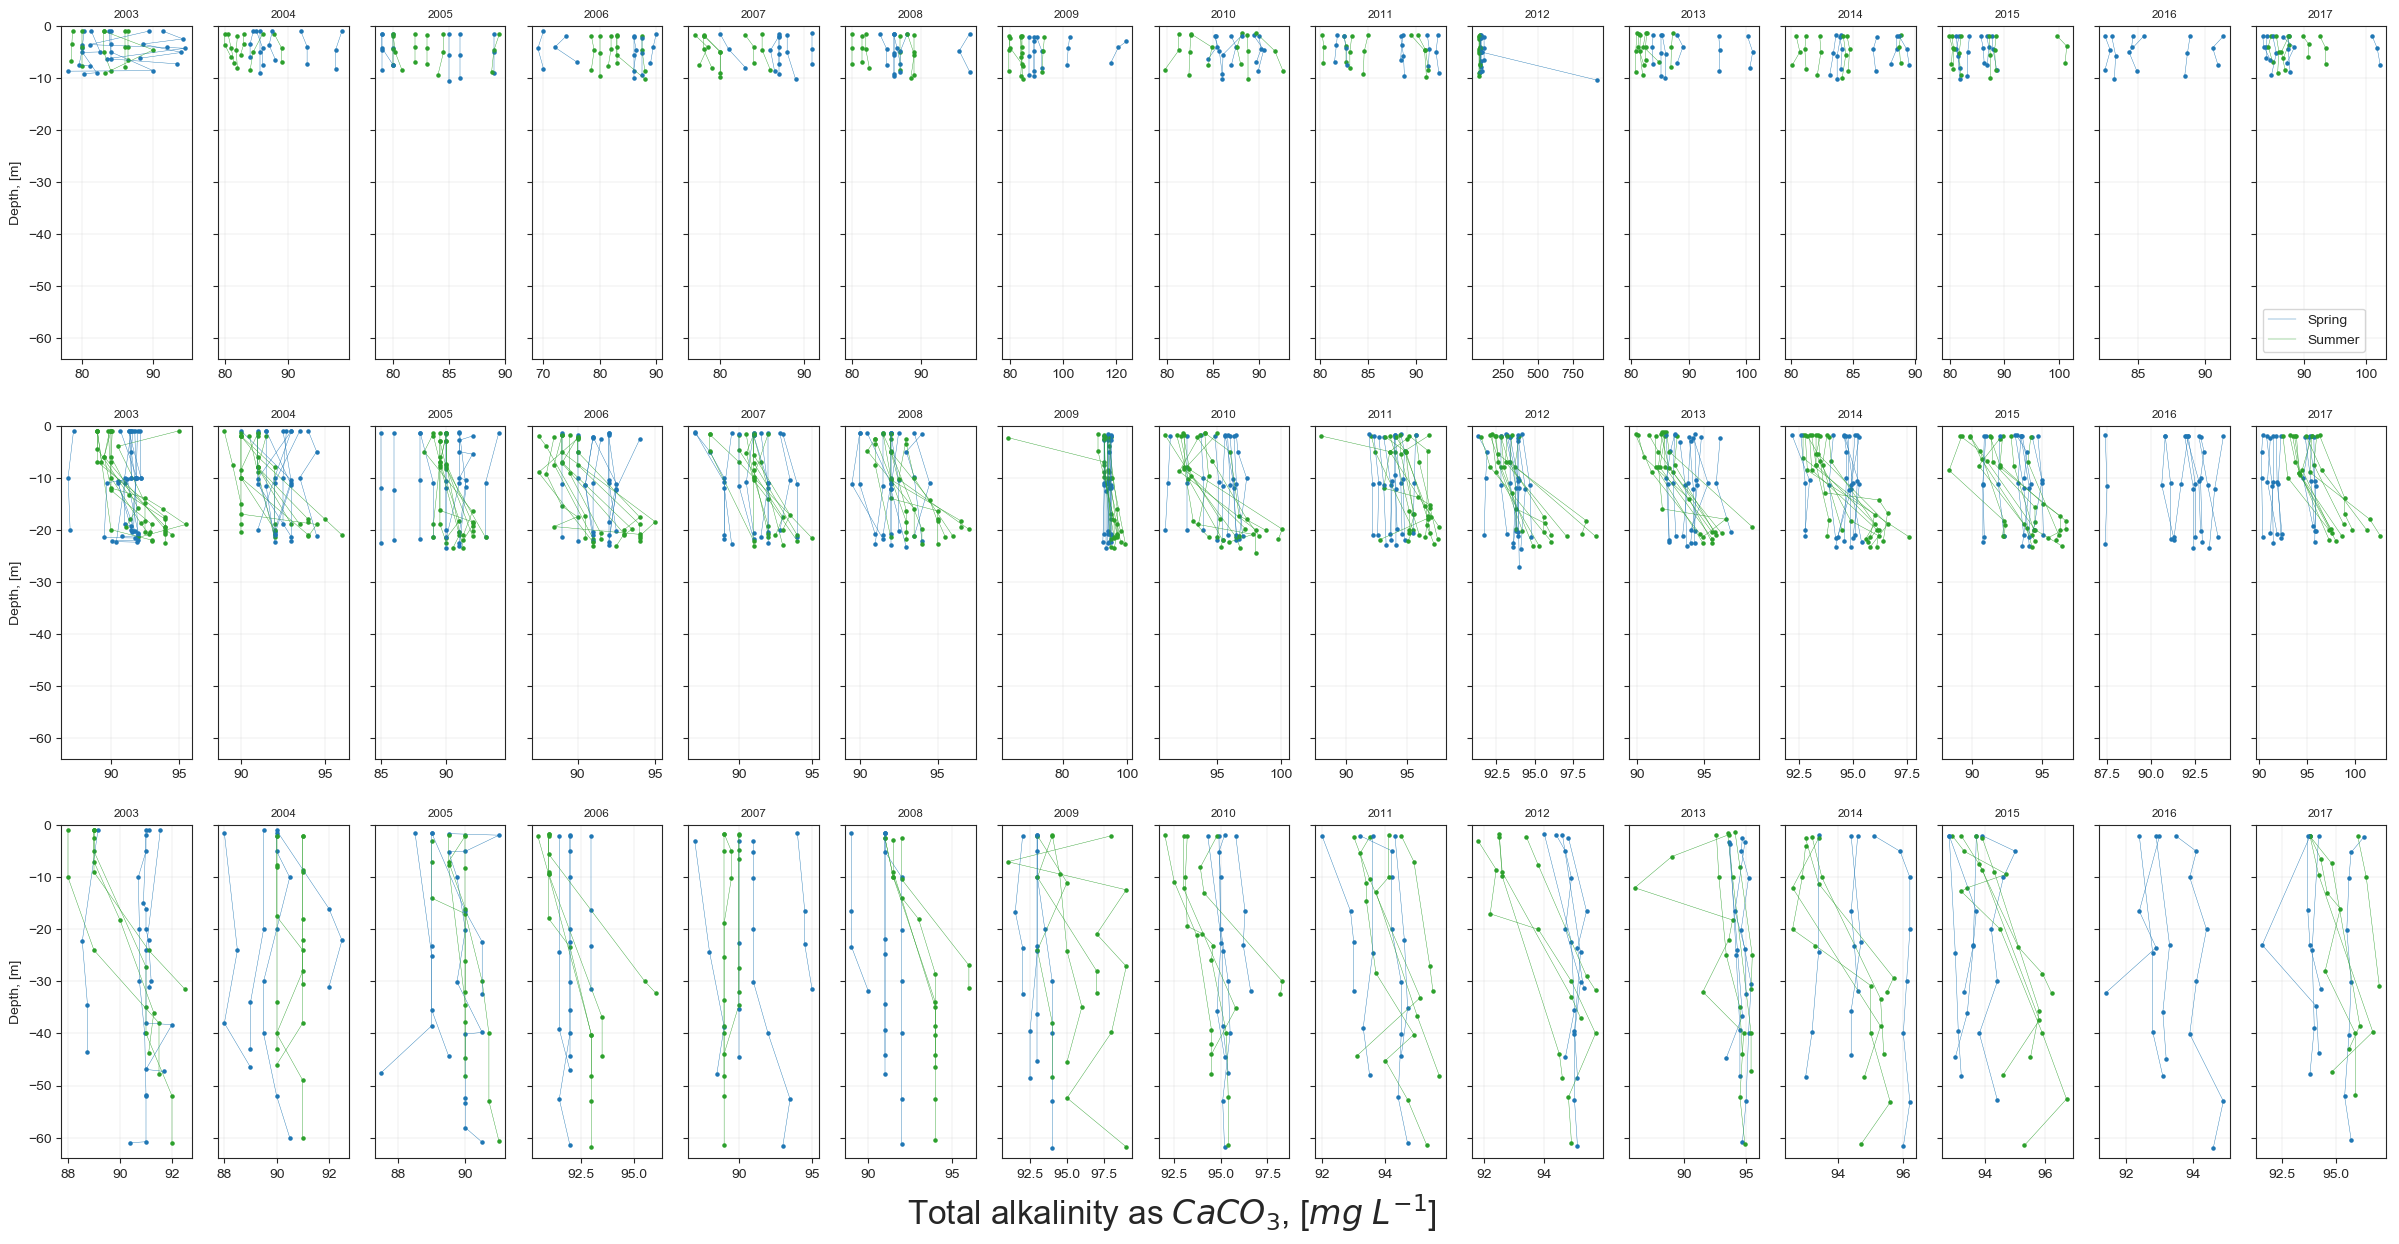

In [64]:
# %matplotlib notebook
# %matplotlib
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for i, st in enumerate(stations):
    if st in eastern_basin:
        i=2
    if st in central_basin:
        i=1
    if st in western_basin:
        i=0
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Alk[(Alk['STATION_ID']==st) & 
                      (Alk['YEAR']==y) &
                    (Alk['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, s=5)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, lw=0.3)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
# axes[2][0].text(8.5,-0.2, 'Chloride concnetrations, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# plt.draw()
# f.savefig('Mass Balance/GLENDA/Chloride_mgL_0_30.pdf')
axes[2][0].text(8.5,-0.2, 'Total alkalinity as $CaCO_3$, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/All Stations/Tot_alkalinity_mgL.pdf')

Text(8.5,-0.2,'pH')

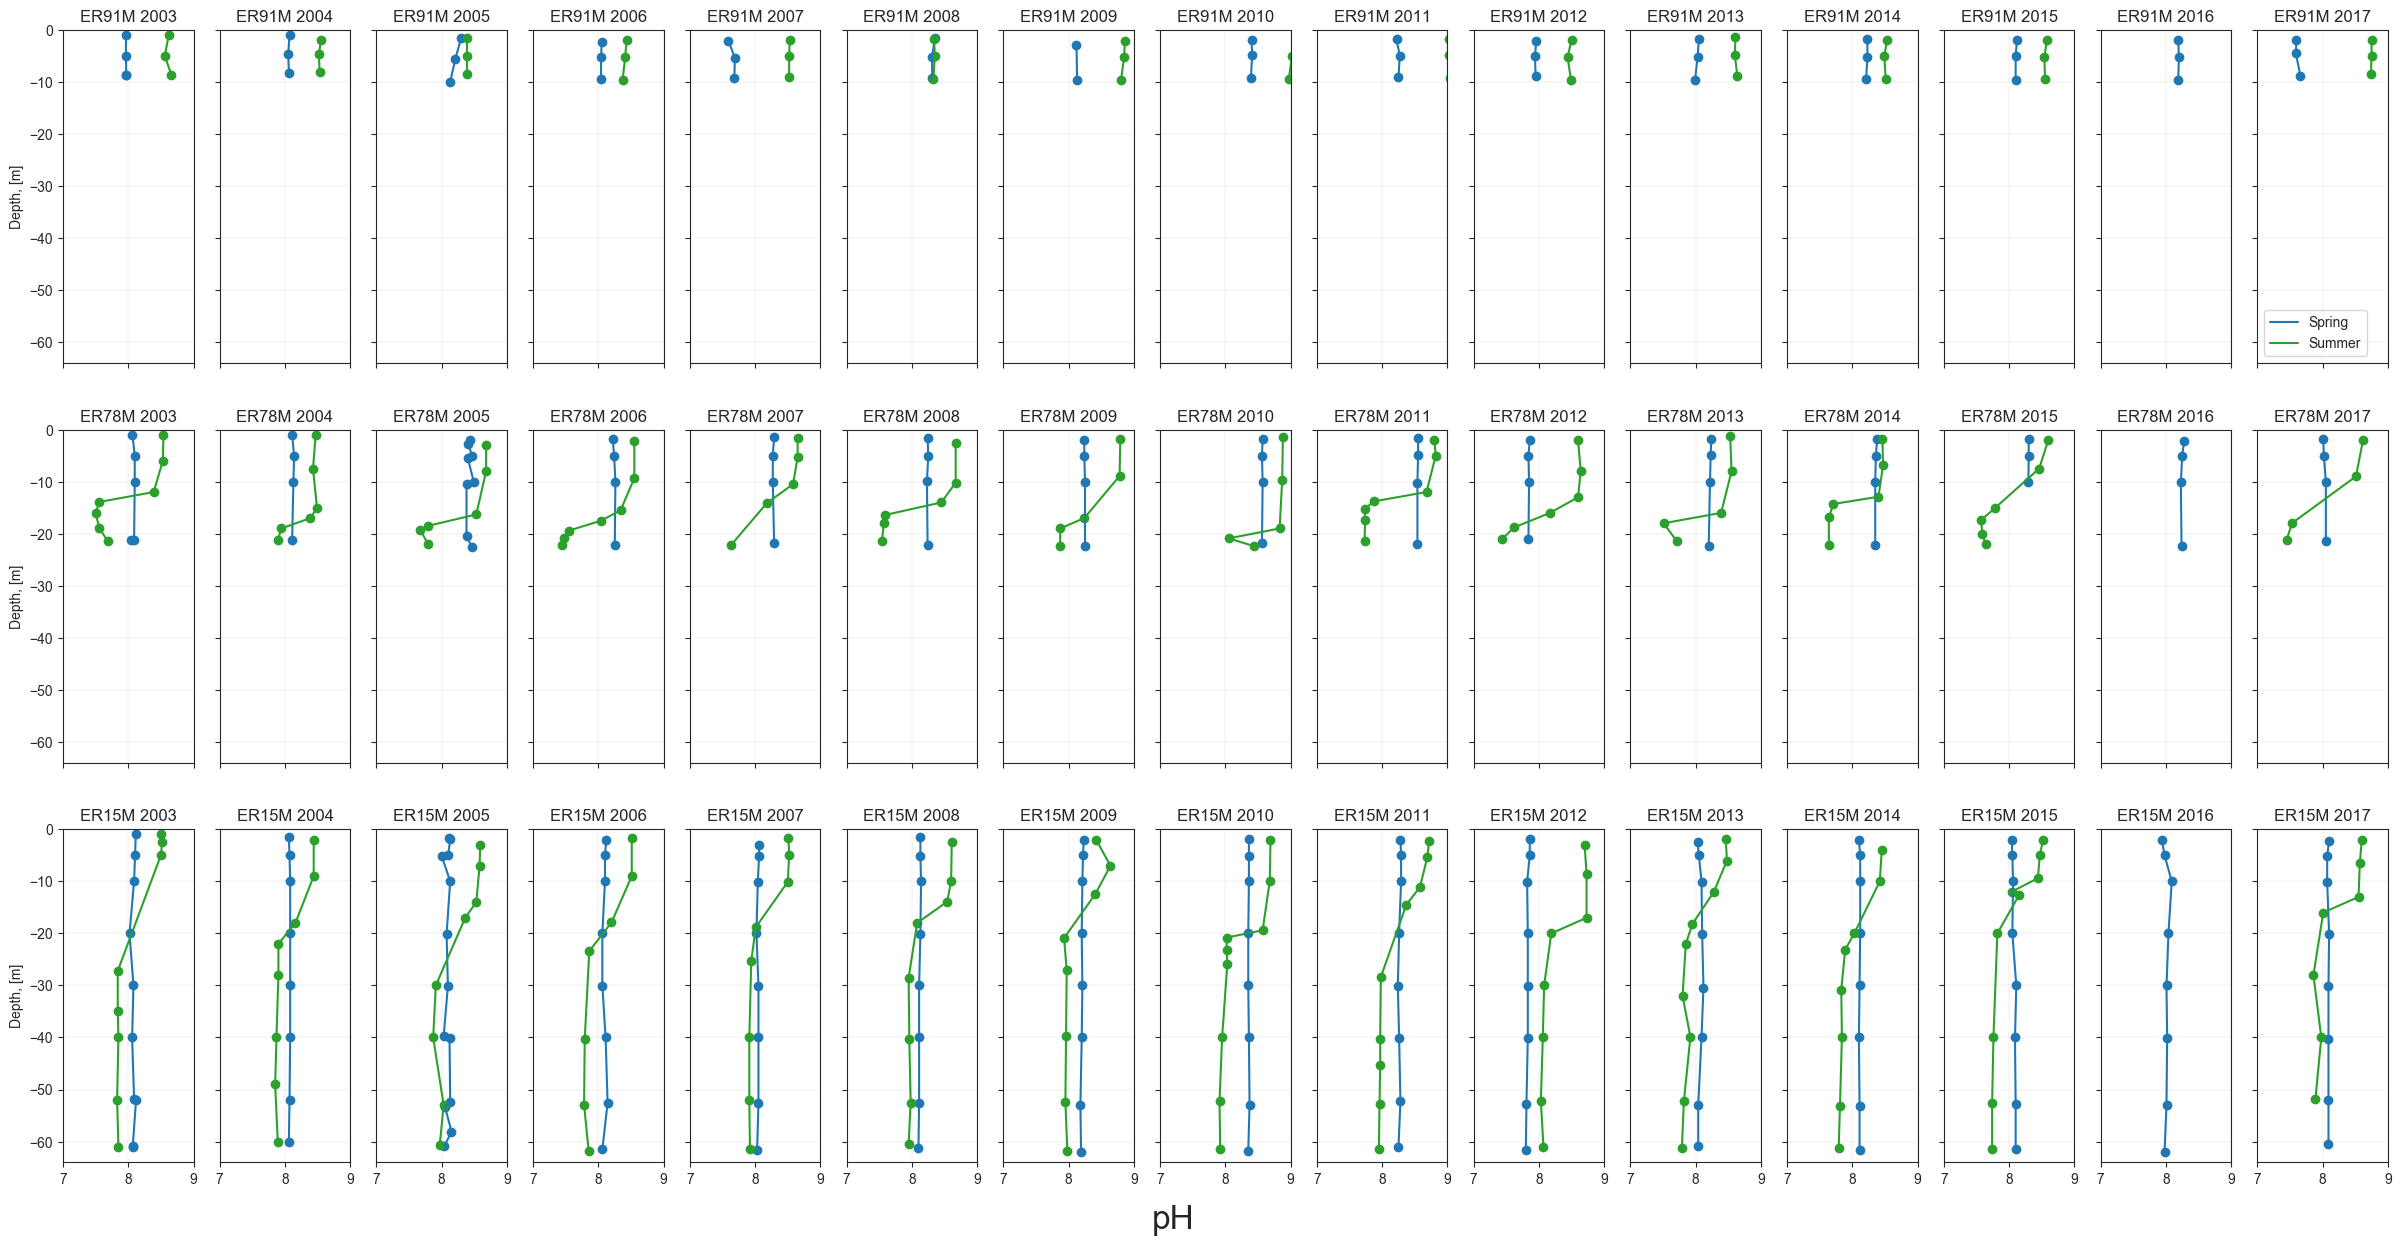

In [13]:
pH = pd.read_csv('../../measurements/GLNPO/Mass Balance/pH.csv')
pH = pH[pH.QC_TYPE=='routine field sample']
pH = pH[pH['STATION_ID'].isin(deep_stations)]
pH = pH[pH['STATION_ID'].isin(deep_stations)]
pH = pH[pH['SEASON'].isin(seasons)]
pH['VALUE_1'] = pd.to_numeric(pH['VALUE_1'], errors='coerce')
# pH = pH[pH['VALUE_1']>50]
pH = pH.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = pH[(pH['STATION_ID']==st) & 
                      (pH['YEAR']==y) &
                    (pH['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(7,9)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'pH', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('pH.pdf')

Text(8.5,-0.2,'Total Phosphorus as P, [$\\mu g$ $L^{-1}$]')

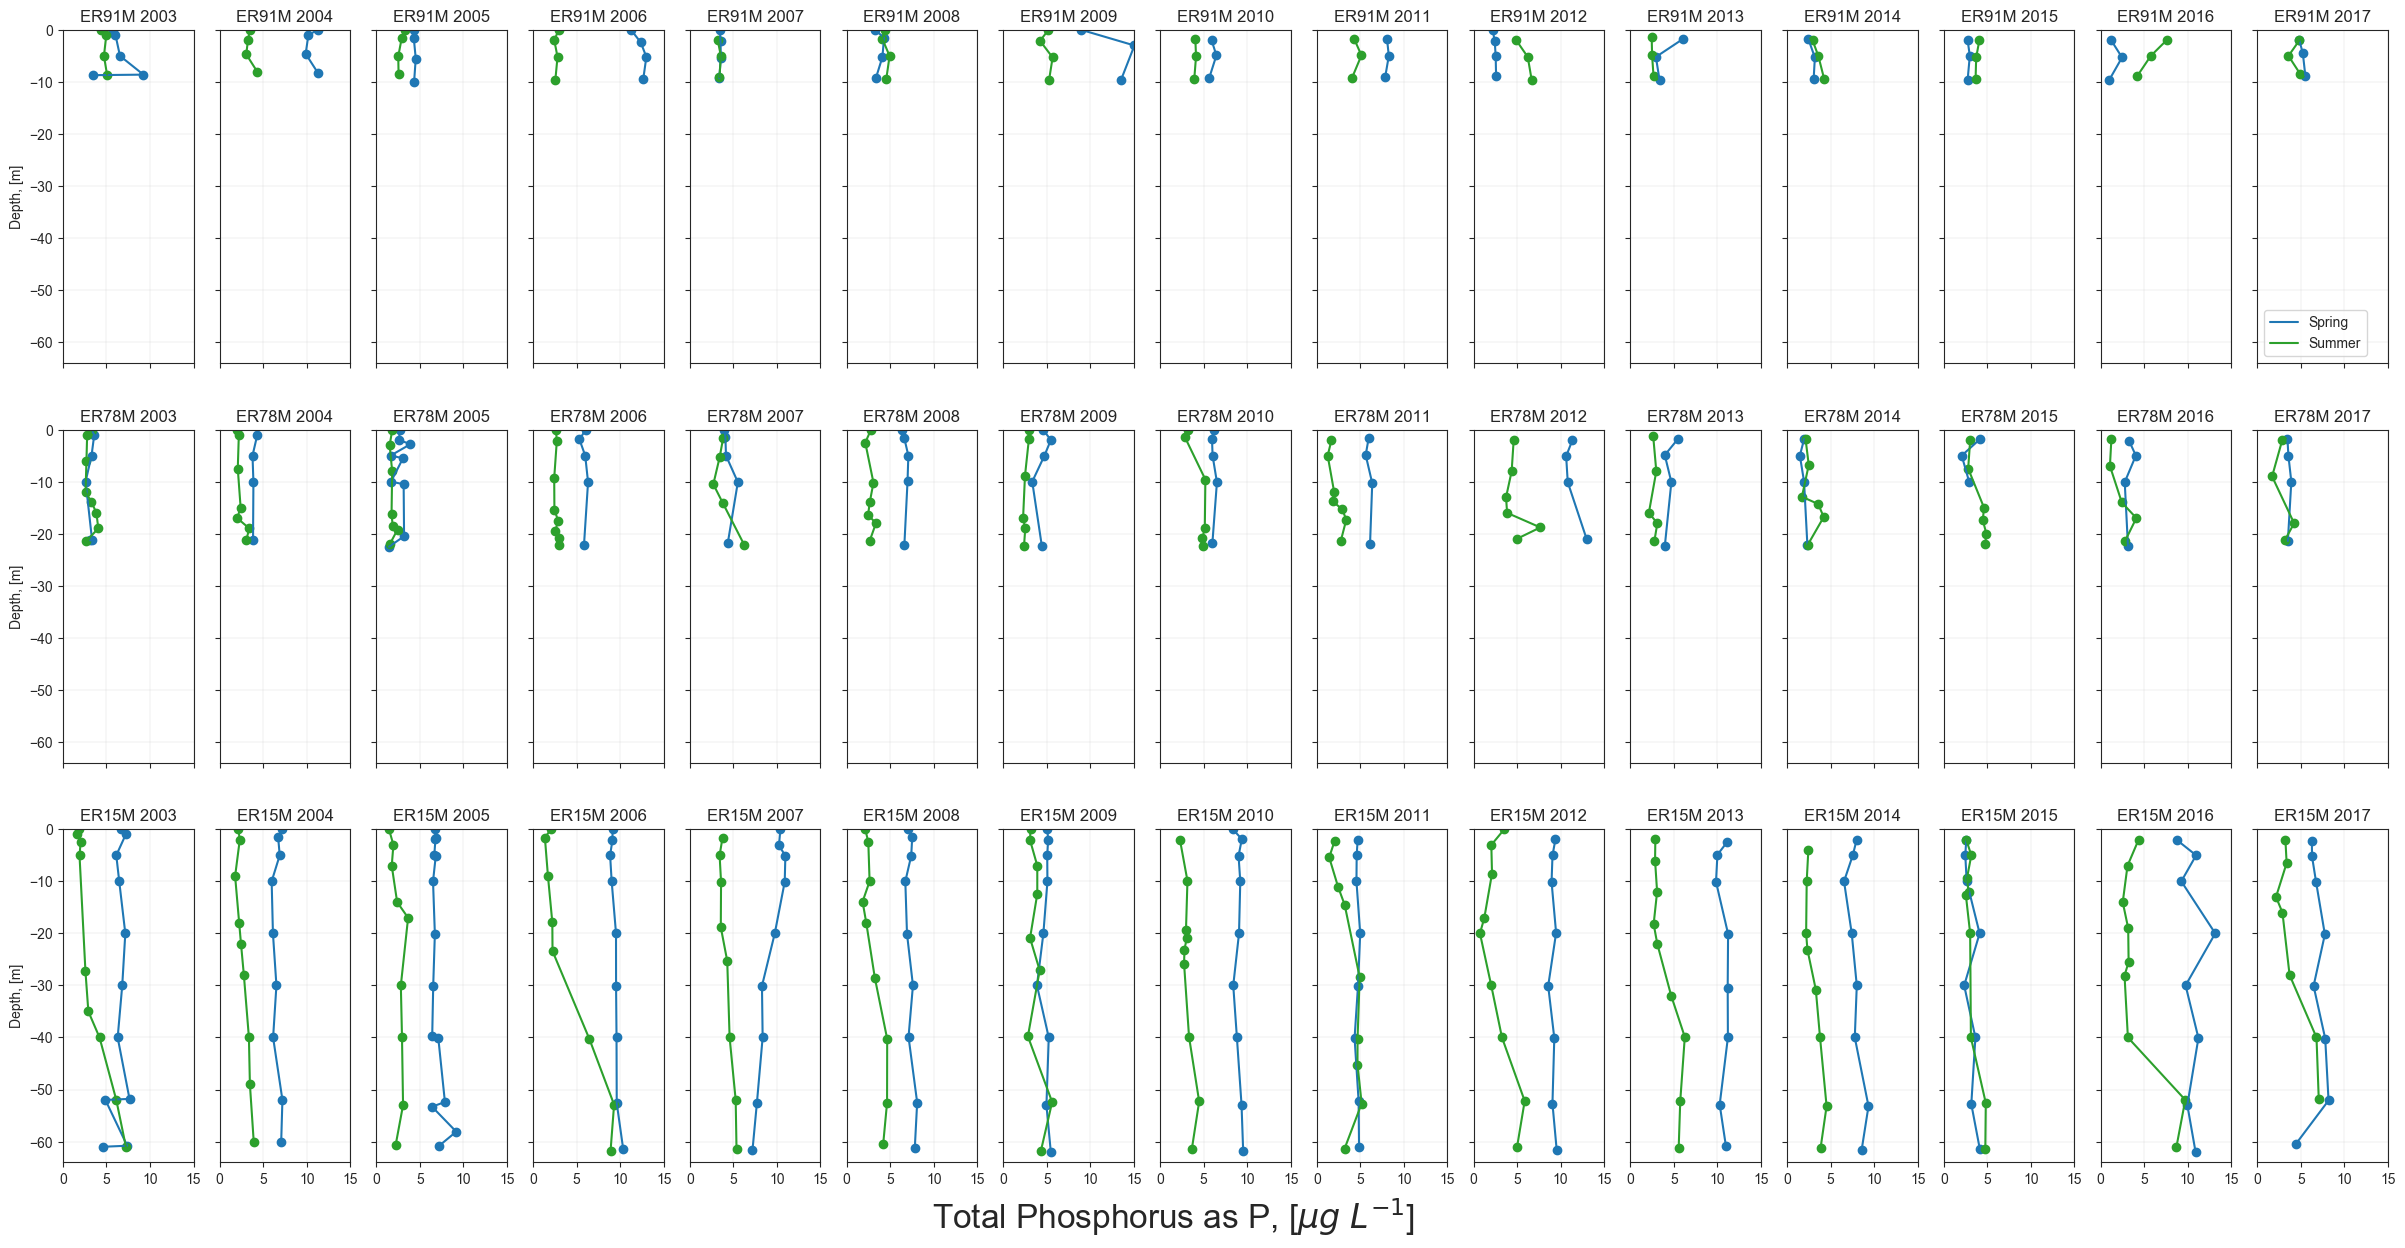

In [14]:
TOTP = pd.read_csv('../../measurements/GLNPO/Mass Balance/TOTP.csv')
TOTP = TOTP[TOTP.QC_TYPE=='routine field sample']
TOTP = TOTP[TOTP['STATION_ID'].isin(deep_stations)]
TOTP = TOTP[TOTP['STATION_ID'].isin(deep_stations)]
TOTP = TOTP[TOTP['SEASON'].isin(seasons)]
TOTP['VALUE_1'] = pd.to_numeric(TOTP['VALUE_1'], errors='coerce')
# TOTP = TOTP[TOTP['VALUE_1']>50]
TOTP = TOTP.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = TOTP[(TOTP['STATION_ID']==st) & 
                      (TOTP['YEAR']==y) &
                    (TOTP['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,15)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Total Phosphorus as P, [$\mu g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('TOTP_ugL.pdf')

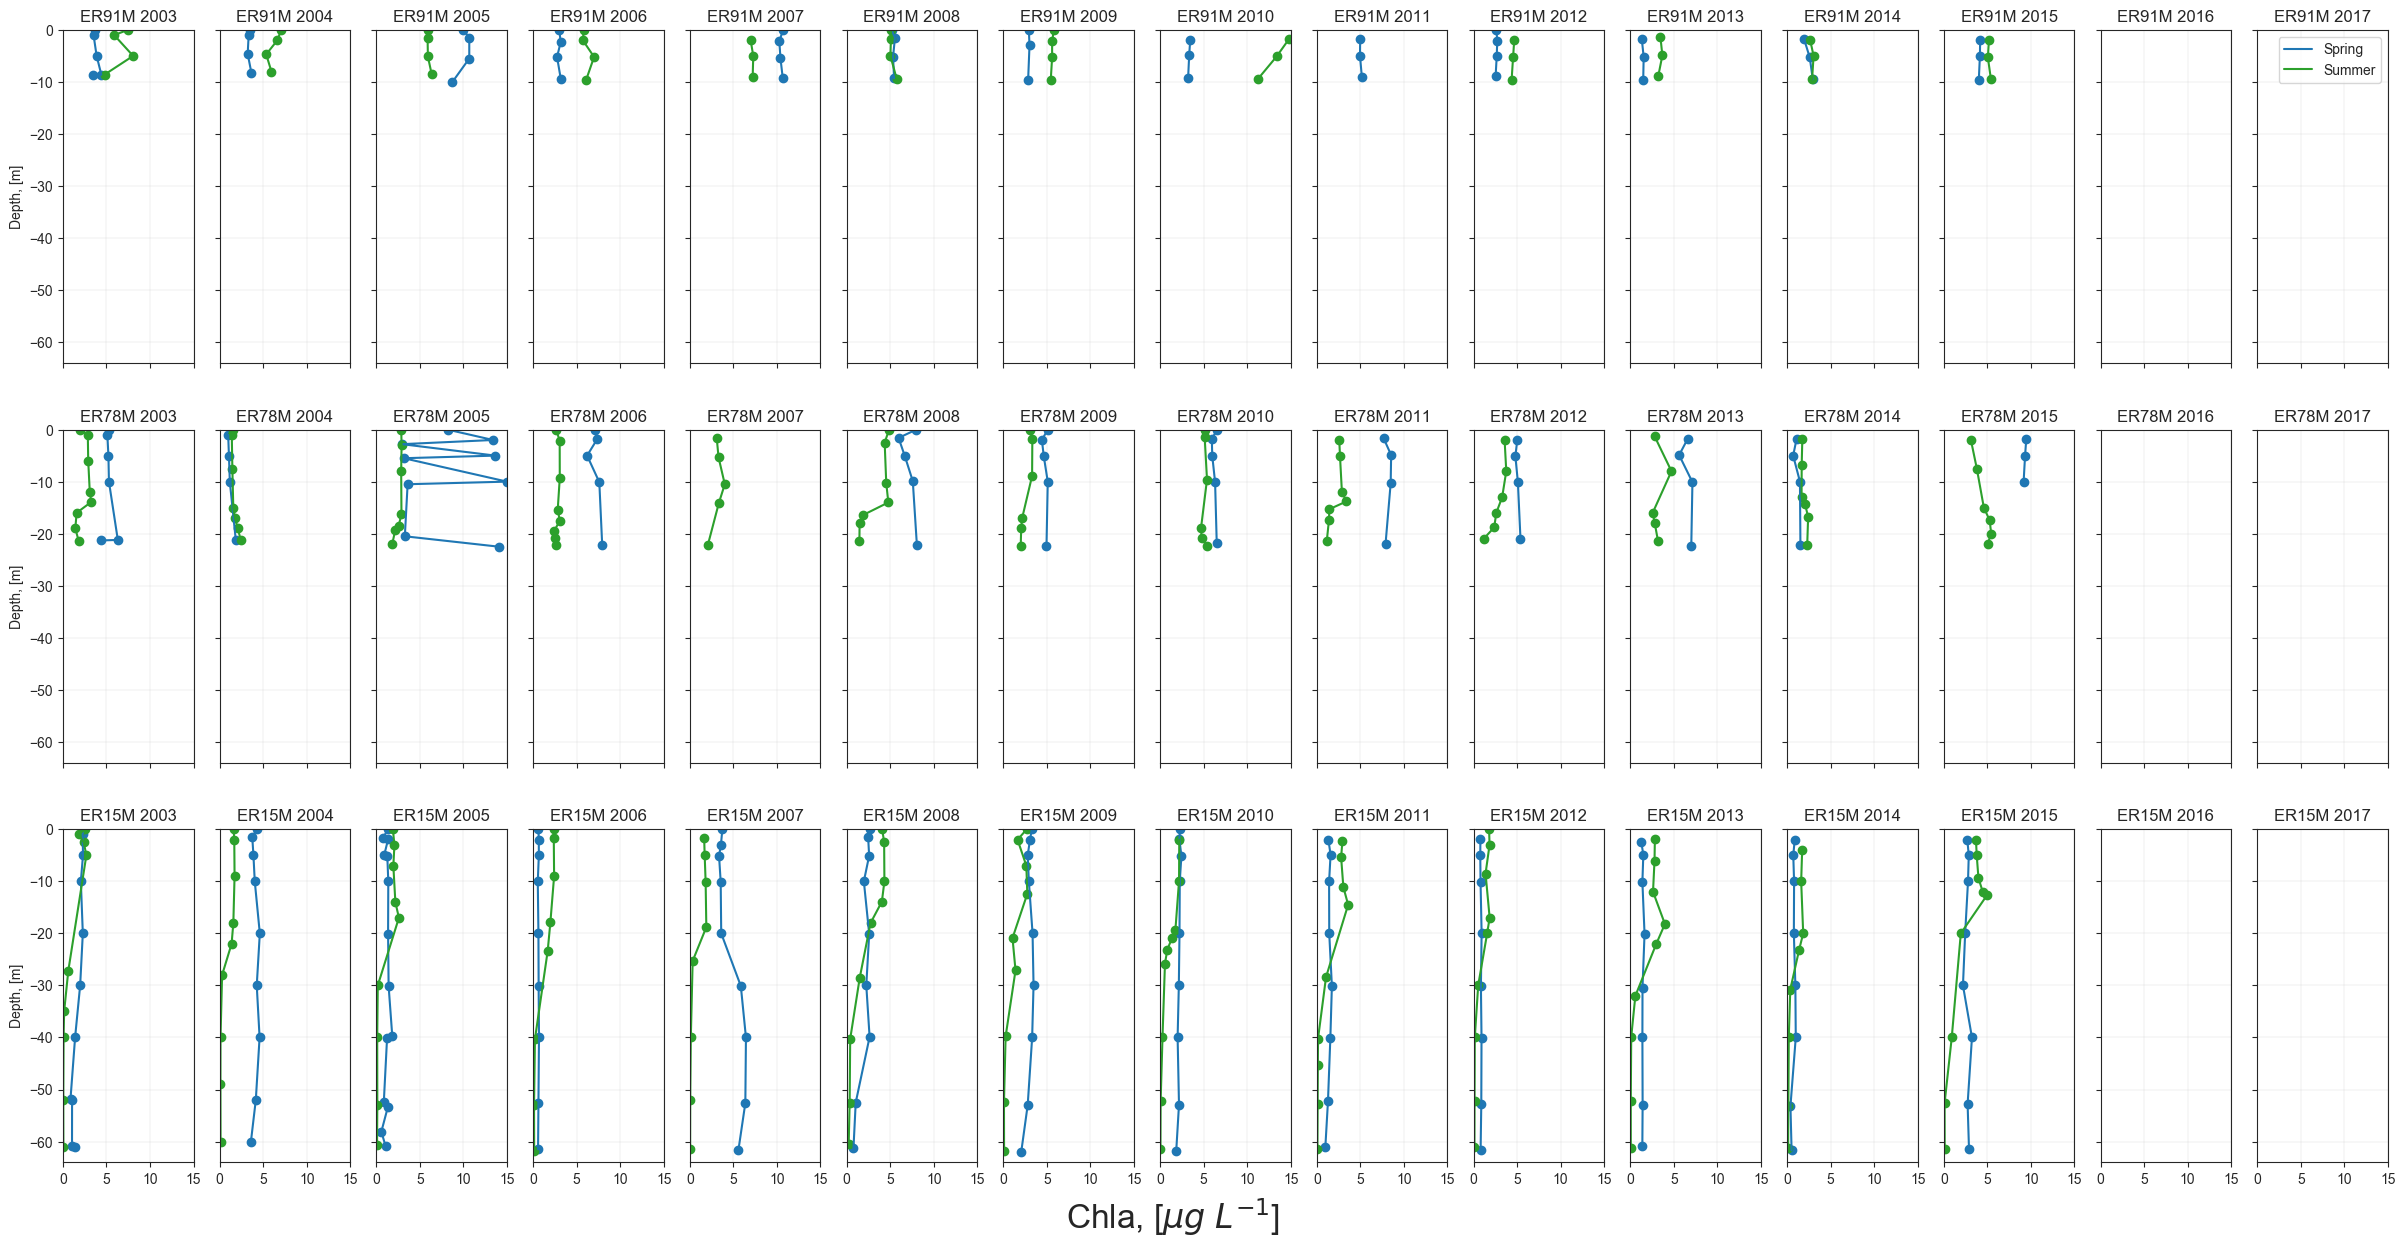

In [8]:
Chla = pd.read_csv('../../measurements/GLNPO/Mass Balance/Chla.csv')
Chla = Chla[Chla.QC_TYPE=='routine field sample']
Chla = Chla[Chla['STATION_ID'].isin(deep_stations)]
Chla = Chla[Chla['STATION_ID'].isin(deep_stations)]
Chla = Chla[Chla['SEASON'].isin(seasons)]
Chla['VALUE_1'] = pd.to_numeric(Chla['VALUE_1'], errors='coerce')
# Chla = Chla[Chla['VALUE_1']>50]
Chla = Chla.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Chla[(Chla['STATION_ID']==st) & 
                      (Chla['YEAR']==y) &
                    (Chla['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,15)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Chla, [$\mu g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/Chla_ugL.pdf')

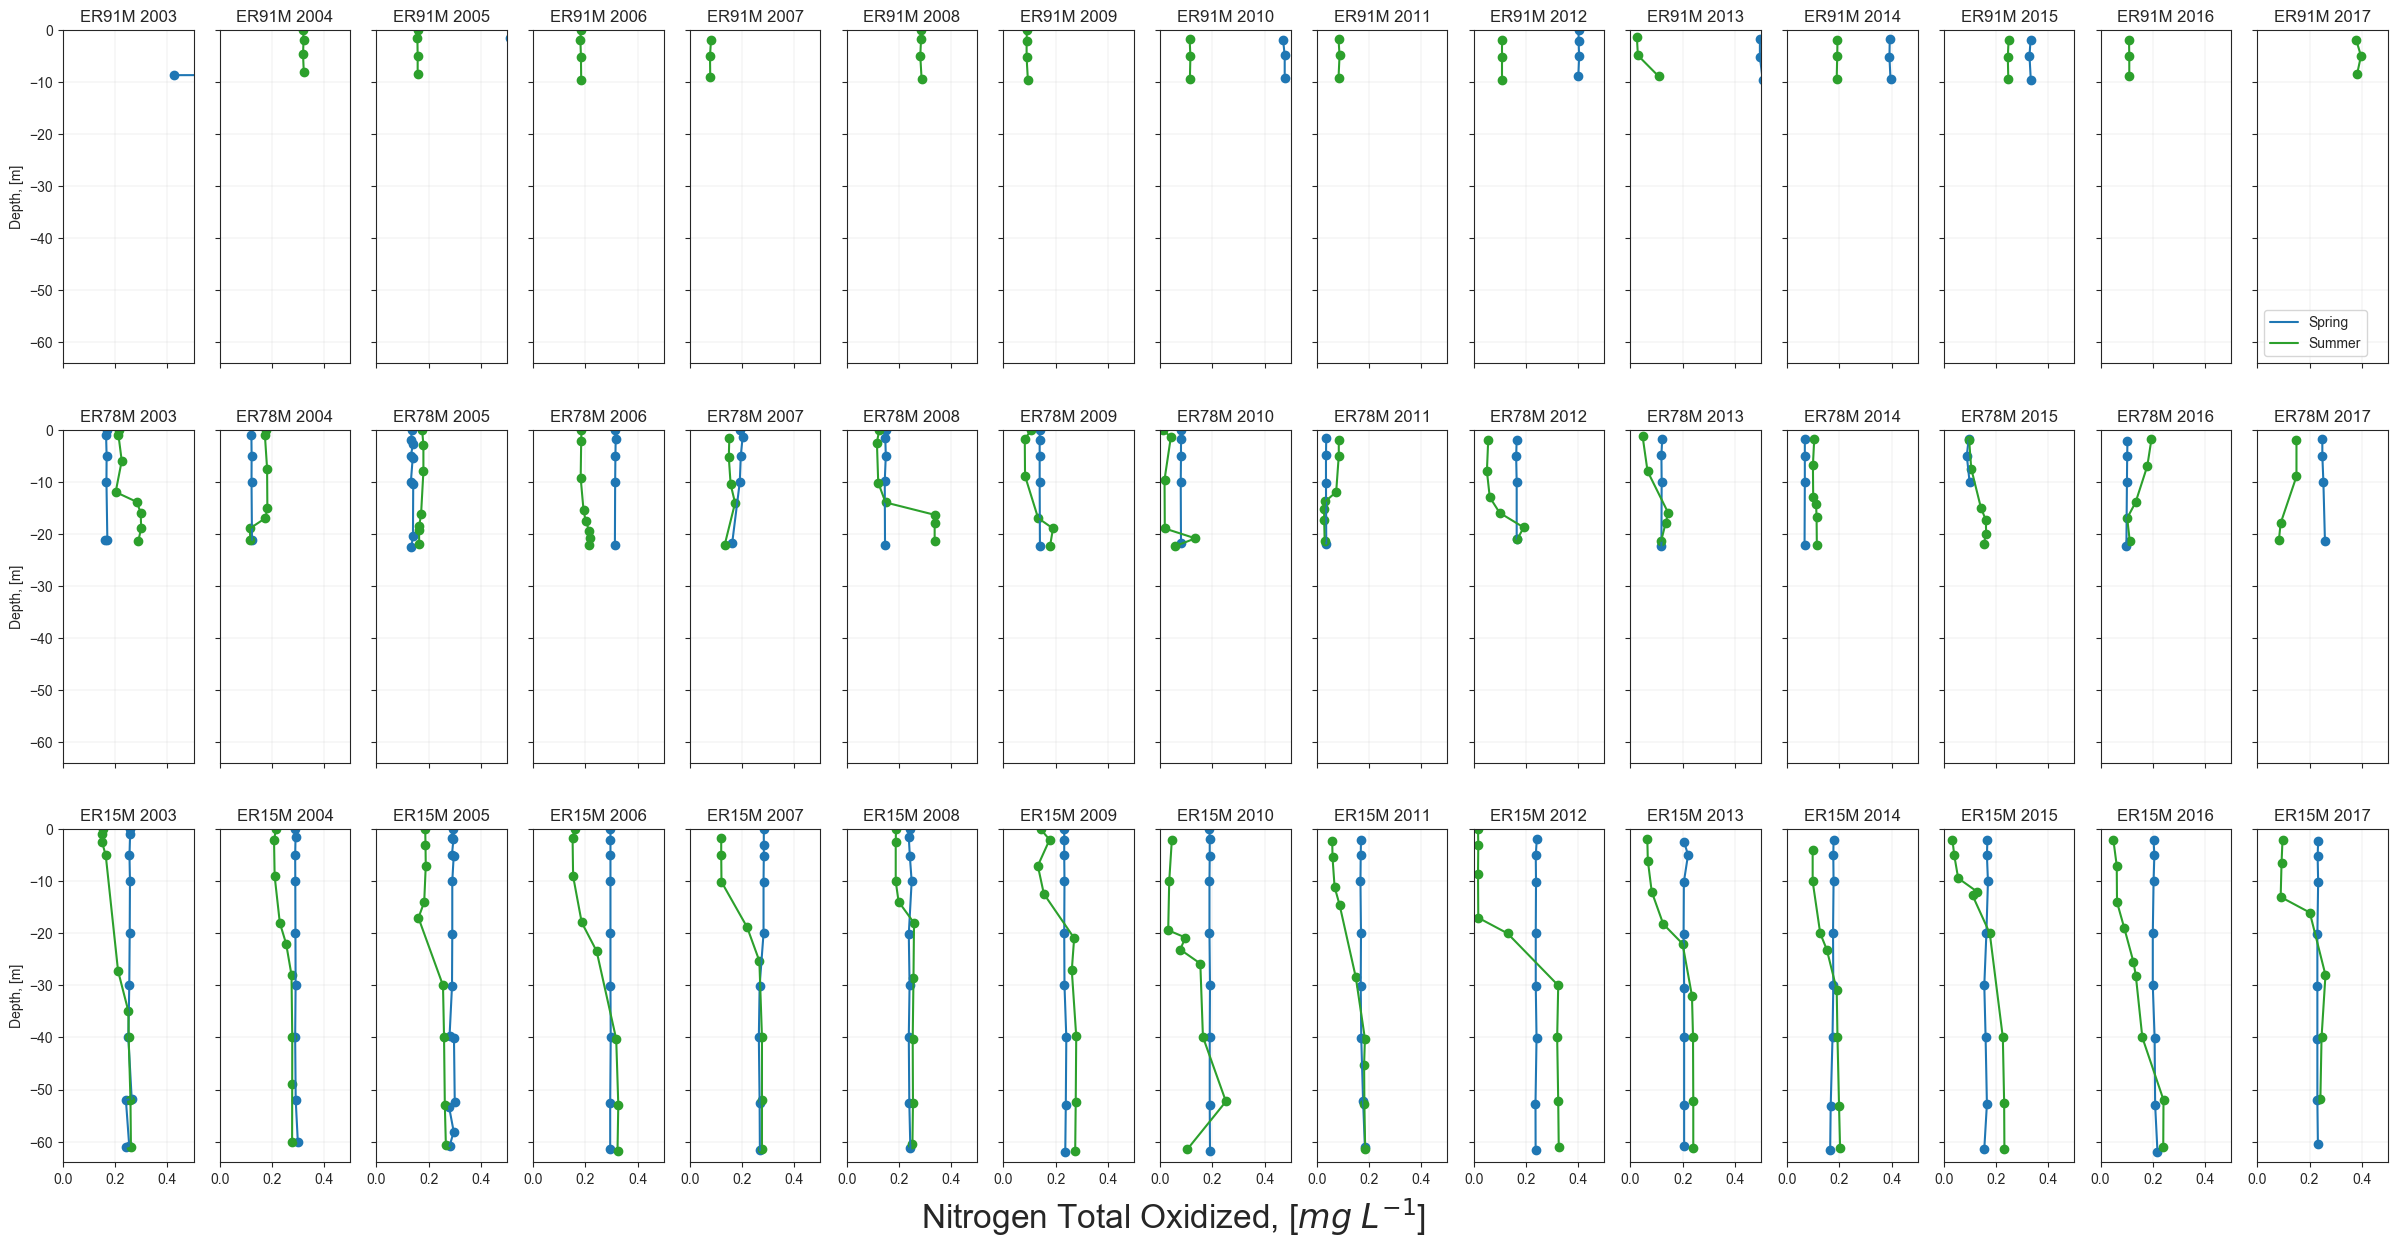

In [16]:
Ntot_oxidized = pd.read_csv('../../measurements/GLNPO/Mass Balance/Ntot_oxidized.csv')
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized.QC_TYPE=='routine field sample']
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['STATION_ID'].isin(deep_stations)]
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['STATION_ID'].isin(deep_stations)]
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['SEASON'].isin(seasons)]
Ntot_oxidized['VALUE_1'] = pd.to_numeric(Ntot_oxidized['VALUE_1'], errors='coerce')
# Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['VALUE_1']>50]
Ntot_oxidized = Ntot_oxidized.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Ntot_oxidized[(Ntot_oxidized['STATION_ID']==st) & 
                      (Ntot_oxidized['YEAR']==y) &
                    (Ntot_oxidized['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,0.5)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Nitrogen Total Oxidized, [$m g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Ntot_oxidized_ugL_0_05.pdf')

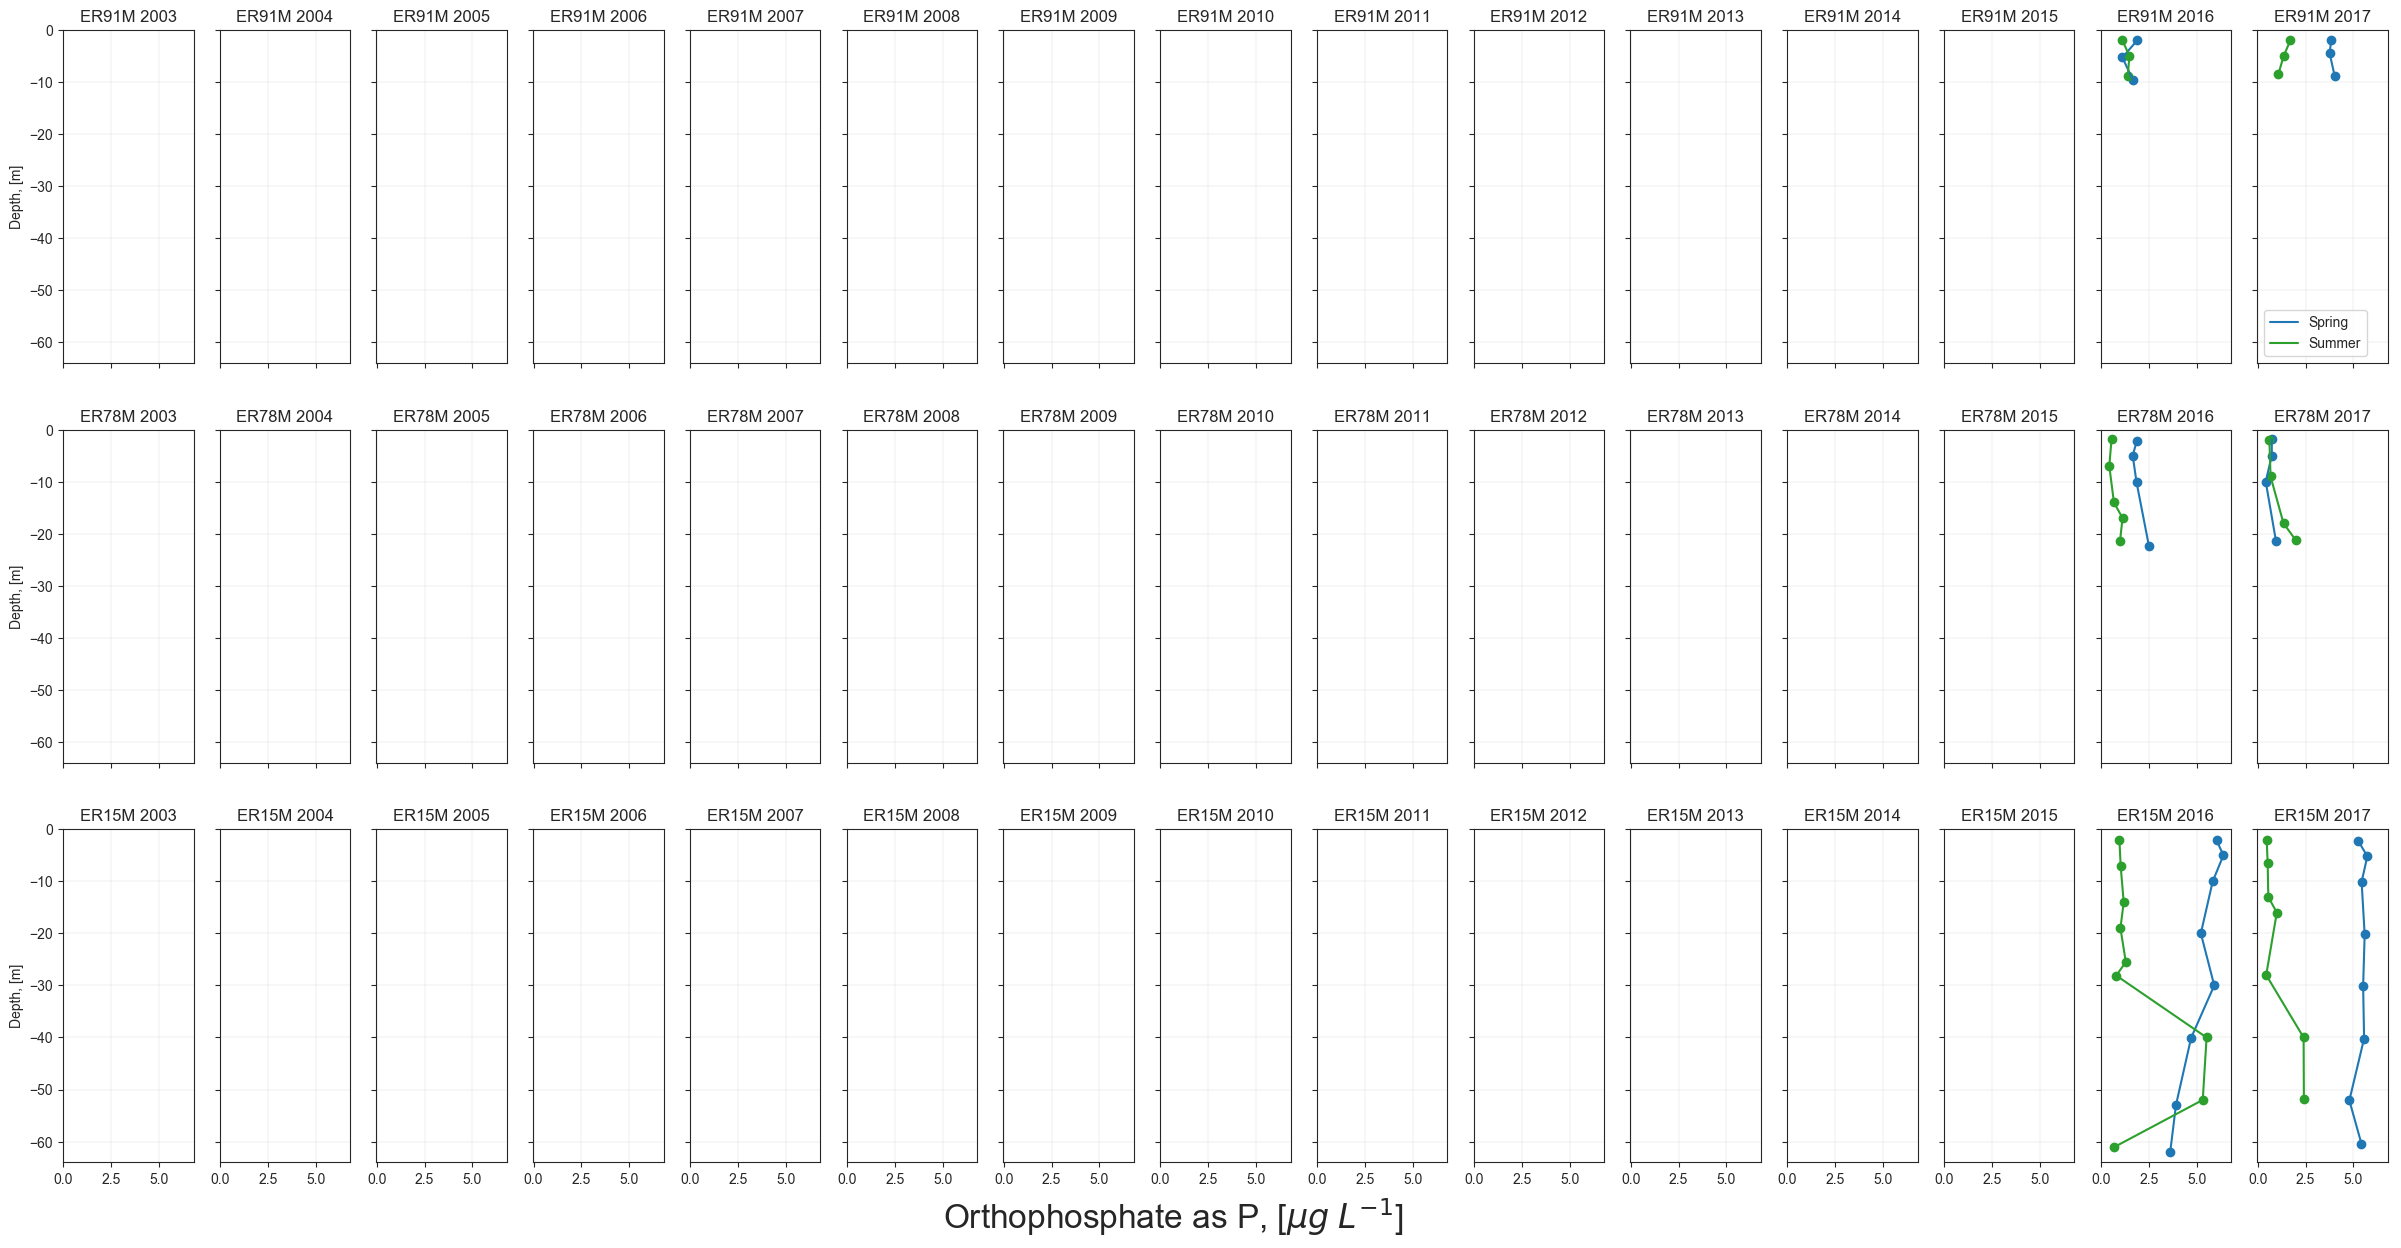

In [17]:
orthoP = pd.read_csv('../../measurements/GLNPO/Mass Balance/orthoP.csv')
orthoP = orthoP[orthoP.QC_TYPE=='routine field sample']
orthoP = orthoP[orthoP['STATION_ID'].isin(deep_stations)]
orthoP = orthoP[orthoP['STATION_ID'].isin(deep_stations)]
orthoP = orthoP[orthoP['SEASON'].isin(seasons)]
orthoP['VALUE_1'] = pd.to_numeric(orthoP['VALUE_1'], errors='coerce')
# orthoP = orthoP[orthoP['VALUE_1']>50]
orthoP = orthoP.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = orthoP[(orthoP['STATION_ID']==st) & 
                      (orthoP['YEAR']==y) &
                    (orthoP['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
#             axes[i][j].set_xlim(0,0.5)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Orthophosphate as P, [$\mu g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('orthoP_ugL.pdf')

Text(8.5,-0.2,'Silica, Dissolved as Si, [$mg$ $L^{-1}$]')

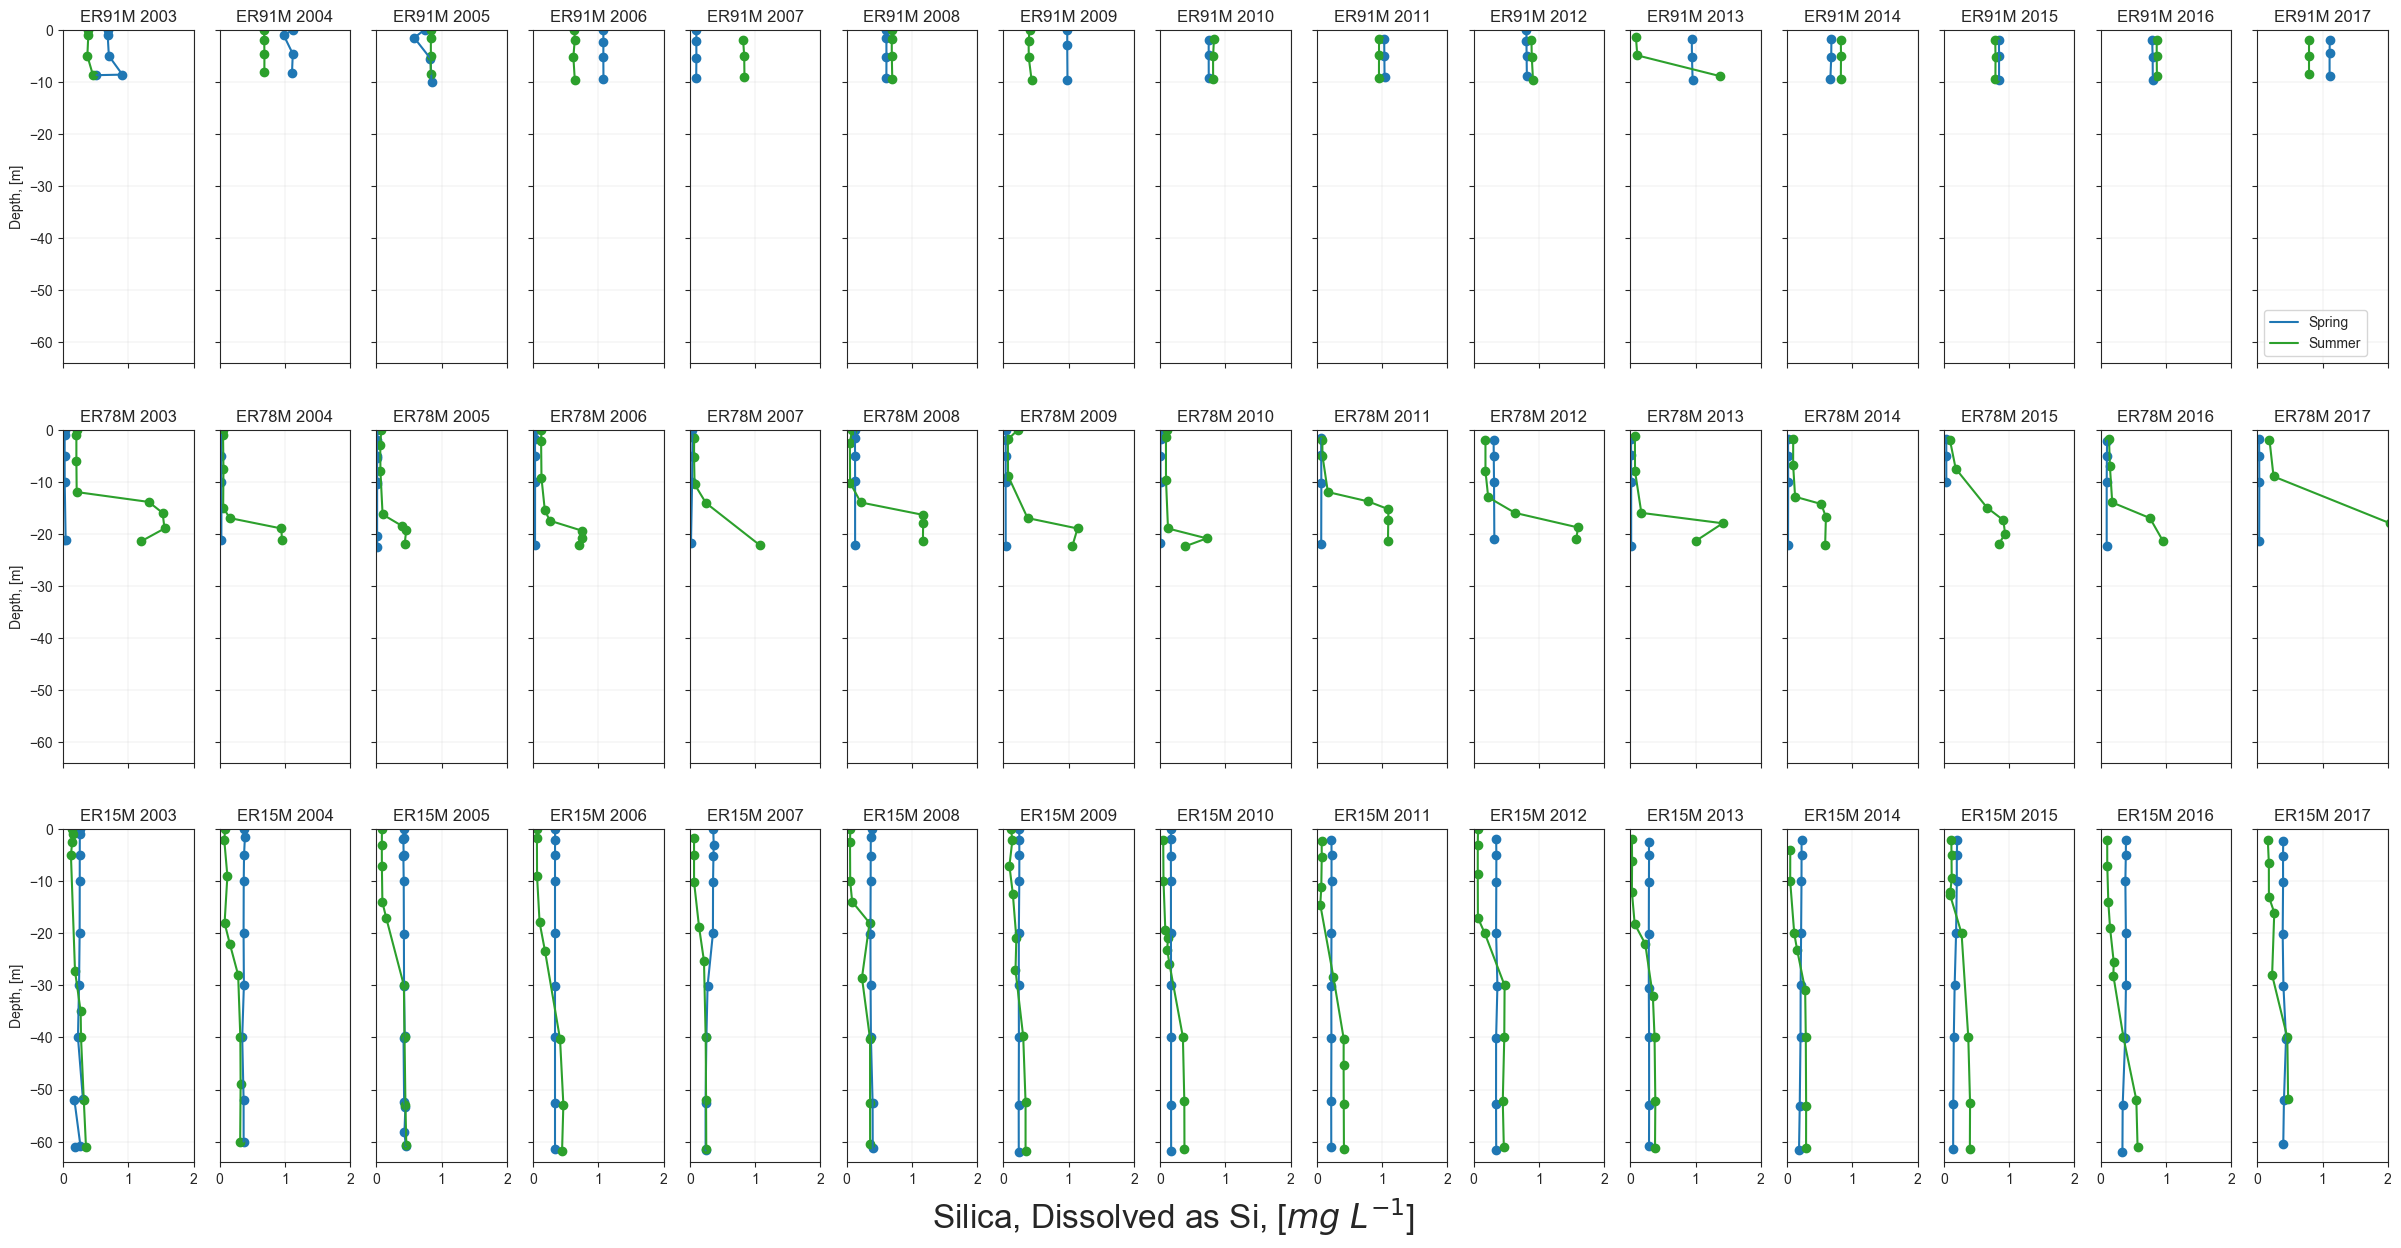

In [18]:
SilicaDissAsSi = pd.read_csv('../../measurements/GLNPO/Mass Balance/SilicaDissAsSi.csv')
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi.QC_TYPE=='routine field sample']
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['STATION_ID'].isin(deep_stations)]
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['STATION_ID'].isin(deep_stations)]
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['SEASON'].isin(seasons)]
SilicaDissAsSi['VALUE_1'] = pd.to_numeric(SilicaDissAsSi['VALUE_1'], errors='coerce')
# SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['VALUE_1']>50]
SilicaDissAsSi = SilicaDissAsSi.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = SilicaDissAsSi[(SilicaDissAsSi['STATION_ID']==st) & 
                      (SilicaDissAsSi['YEAR']==y) &
                    (SilicaDissAsSi['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,2)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Silica, Dissolved as Si, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('SilicaDissAsSi_ugL.pdf')

Text(8.5,-0.2,'Silica, Total as Si, [$mg$ $L^{-1}$]')

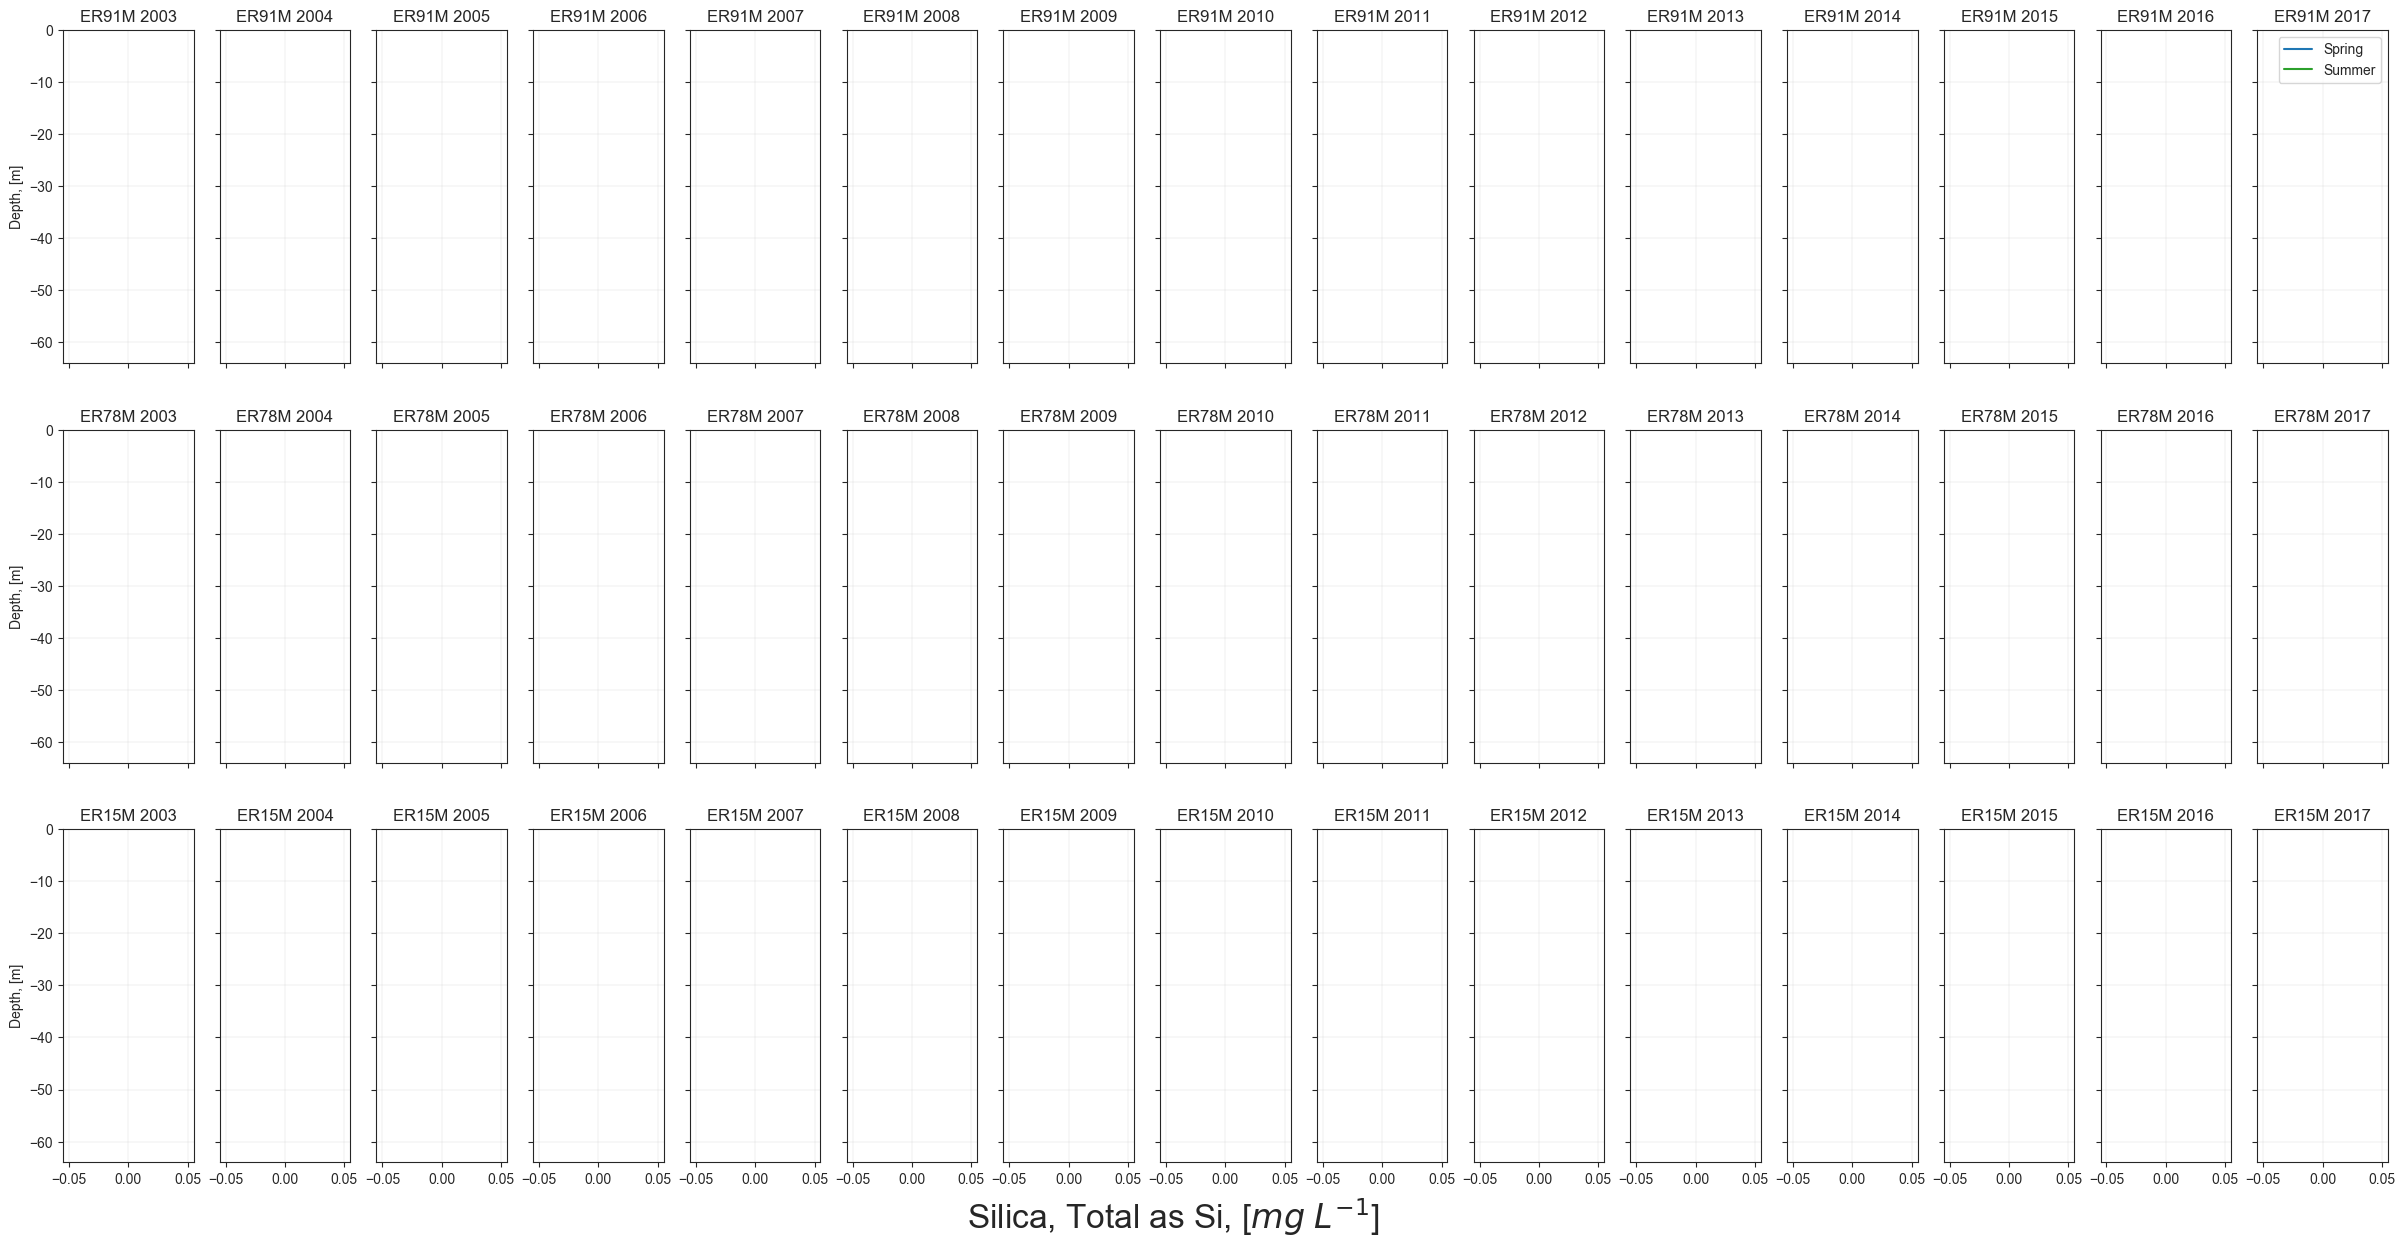

In [19]:
SiTotal = pd.read_csv('../../measurements/GLNPO/Mass Balance/SiTotal.csv')
SiTotal = SiTotal[SiTotal.QC_TYPE=='routine field sample']
SiTotal = SiTotal[SiTotal['STATION_ID'].isin(deep_stations)]
SiTotal = SiTotal[SiTotal['STATION_ID'].isin(deep_stations)]
SiTotal = SiTotal[SiTotal['SEASON'].isin(seasons)]
SiTotal['VALUE_1'] = pd.to_numeric(SiTotal['VALUE_1'], errors='coerce')
# SiTotal = SiTotal[SiTotal['VALUE_1']>50]
SiTotal = SiTotal.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = SiTotal[(SiTotal['STATION_ID']==st) & 
                      (SiTotal['YEAR']==y) &
                    (SiTotal['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
#             axes[i][j].set_xlim(0,2)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Silica, Total as Si, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('SiTotal_ugL.pdf')

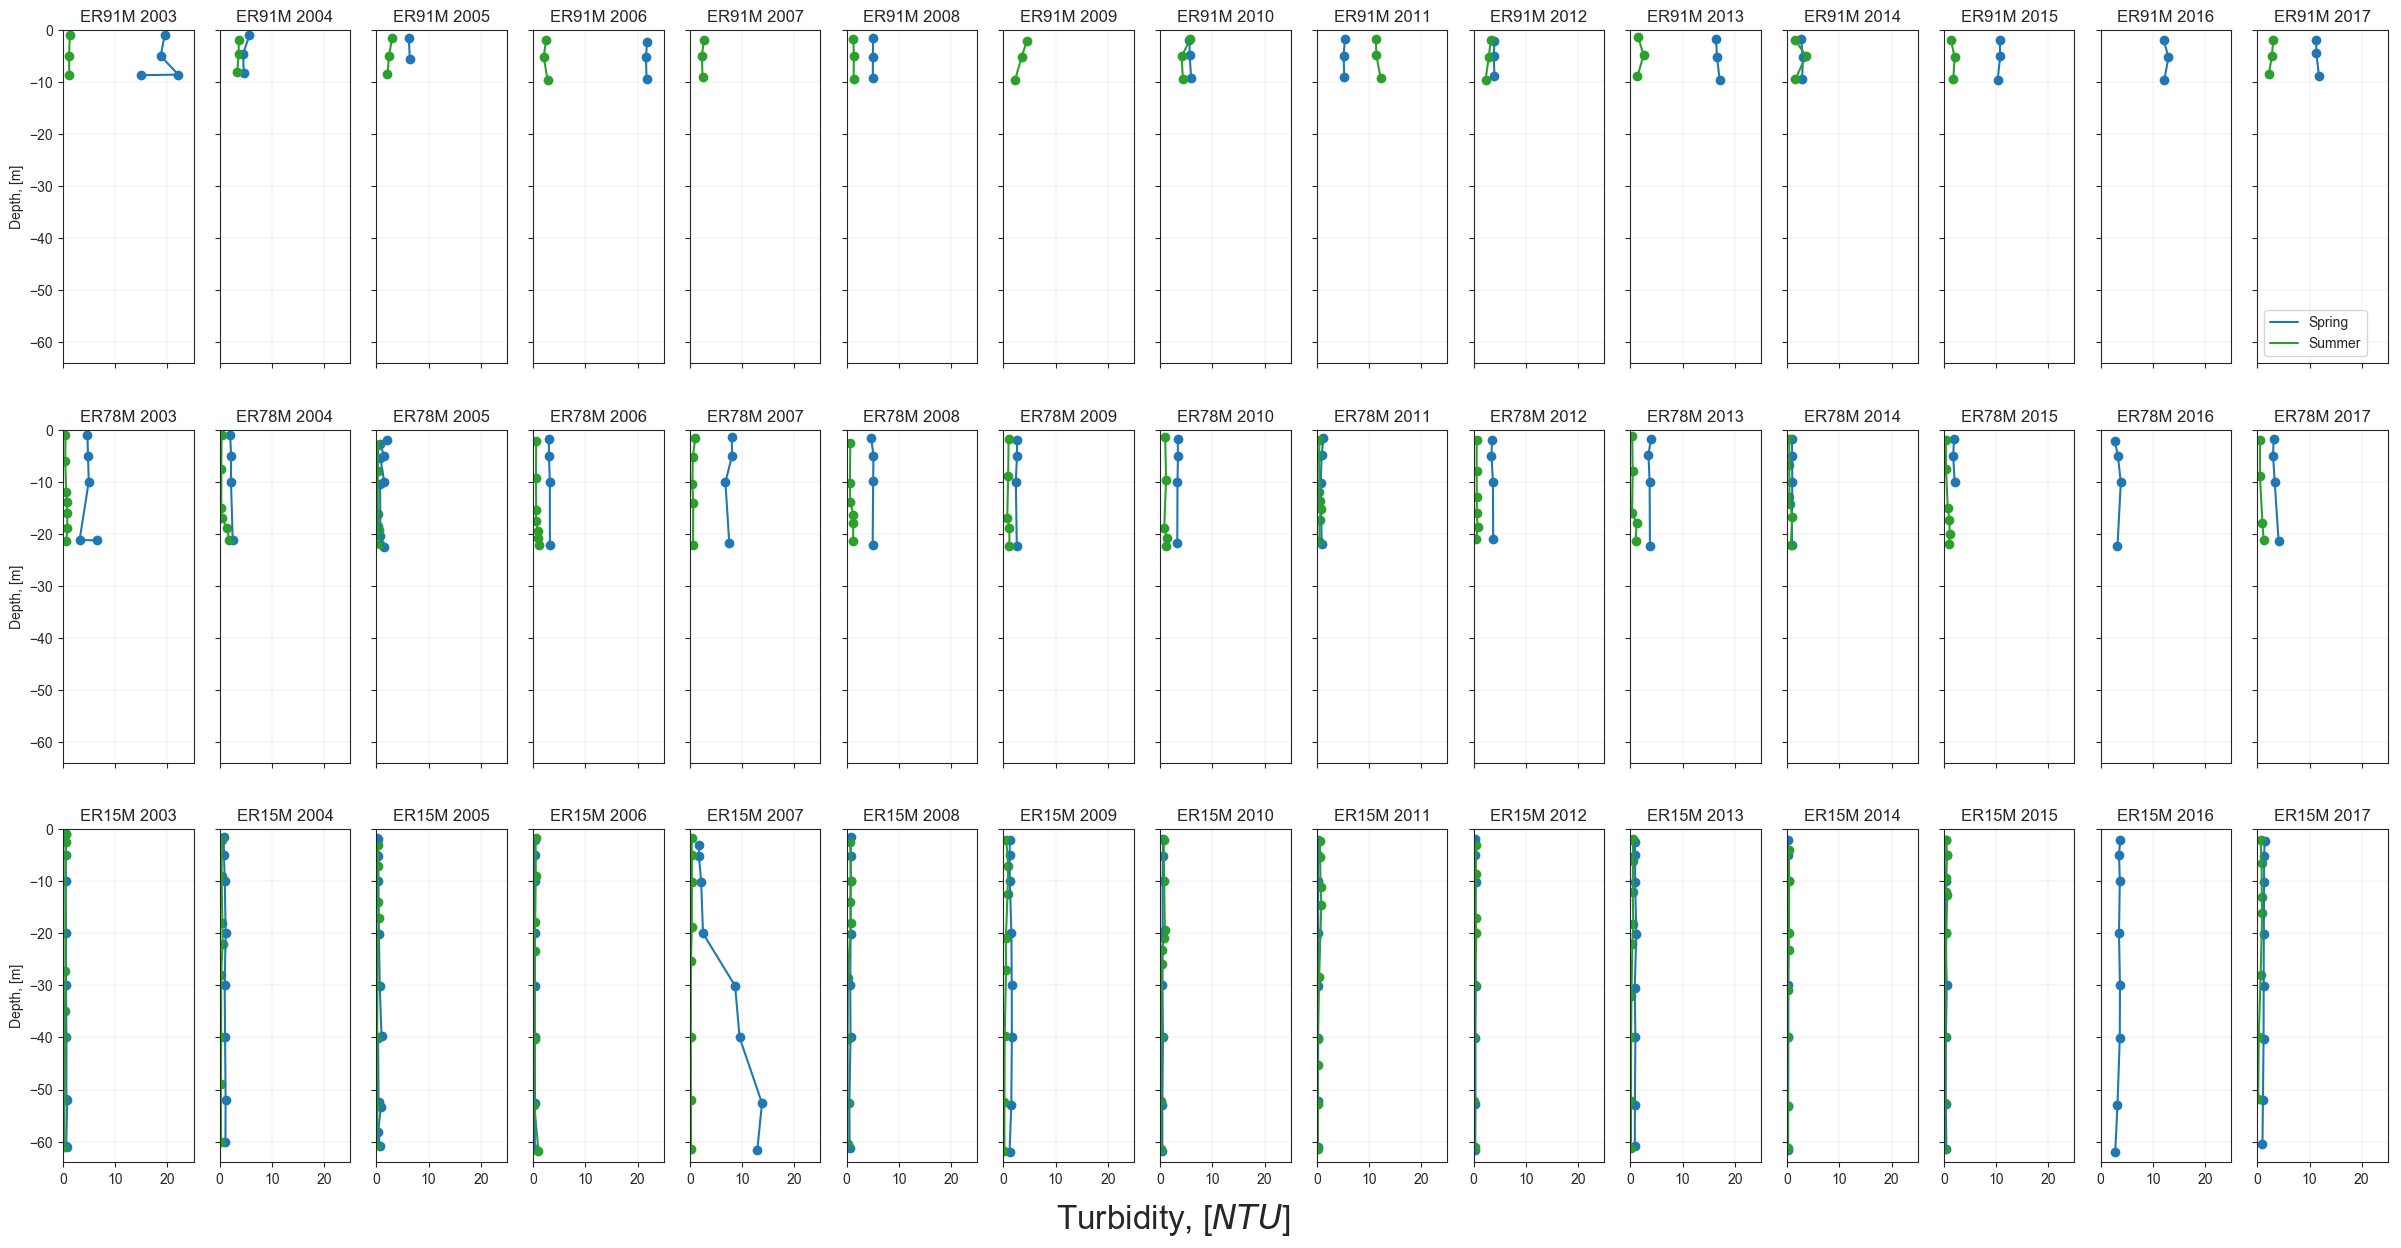

In [20]:
Turbidity = pd.read_csv('../../measurements/GLNPO/Mass Balance/Turbidity.csv')
Turbidity = Turbidity[Turbidity.QC_TYPE=='routine field sample']
Turbidity = Turbidity[Turbidity['STATION_ID'].isin(deep_stations)]
Turbidity = Turbidity[Turbidity['STATION_ID'].isin(deep_stations)]
Turbidity = Turbidity[Turbidity['SEASON'].isin(seasons)]
Turbidity['VALUE_1'] = pd.to_numeric(Turbidity['VALUE_1'], errors='coerce')
# Turbidity = Turbidity[Turbidity['VALUE_1']>50]
Turbidity = Turbidity.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Turbidity[(Turbidity['STATION_ID']==st) & 
                      (Turbidity['YEAR']==y) &
                    (Turbidity['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,25)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Turbidity, [$NTU$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/Turbidity_NTU.pdf')

Text(8.5,-0.2,'Conductivity, [$umho$ $cm^{-1}$]')

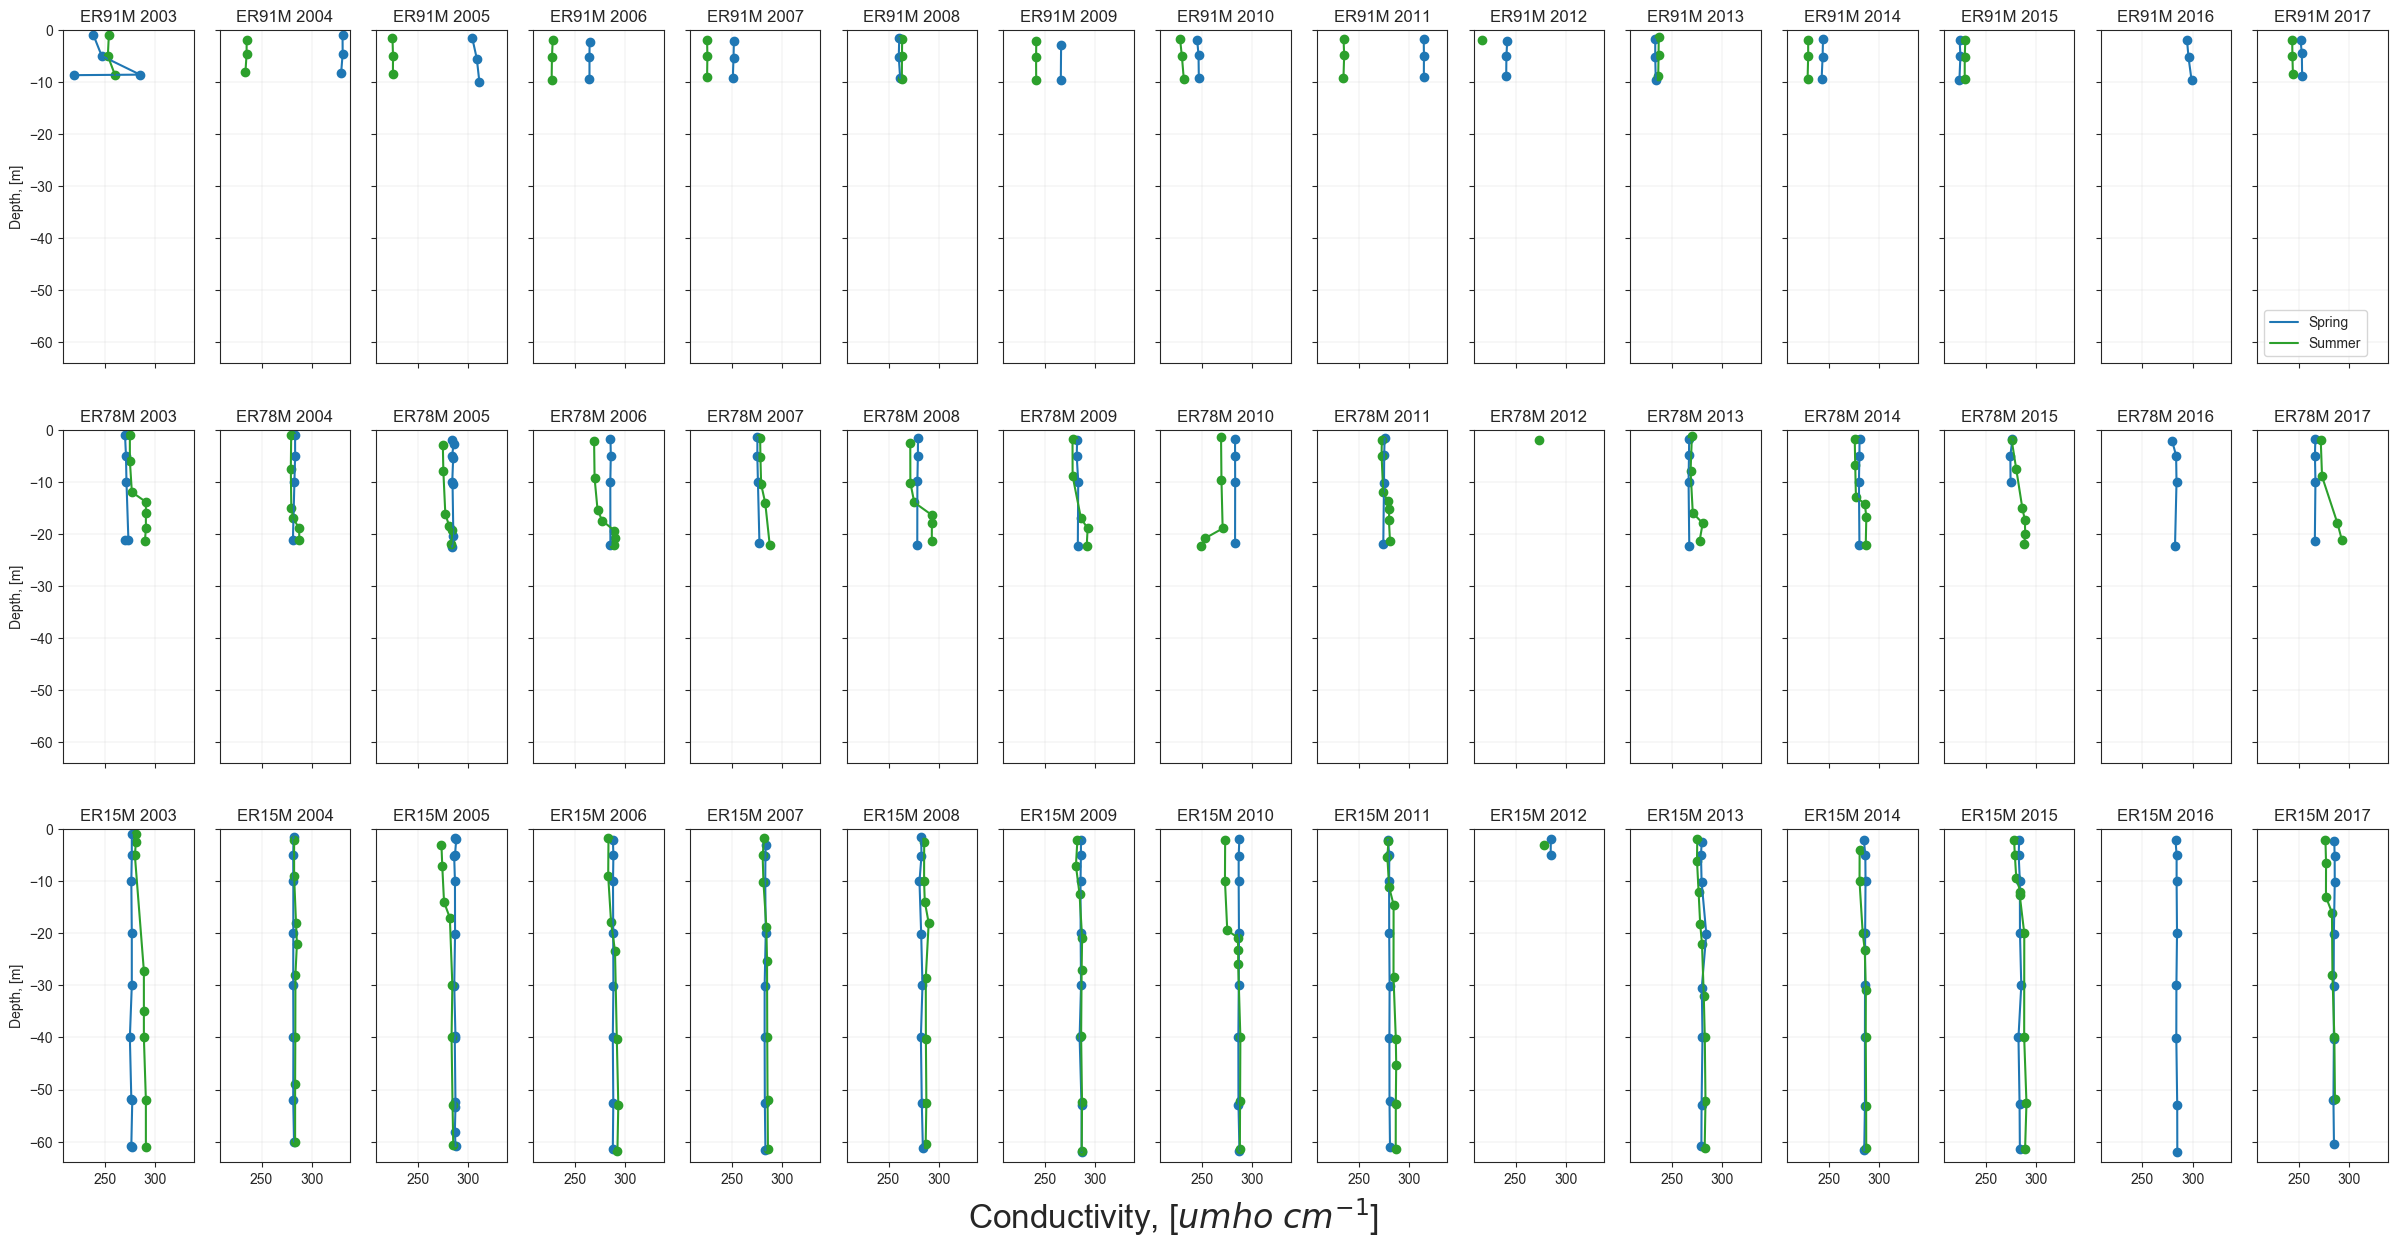

In [21]:
Conductivity = pd.read_csv('../../measurements/GLNPO/Mass Balance/Conductivity.csv')
Conductivity = Conductivity[Conductivity.QC_TYPE=='routine field sample']
Conductivity = Conductivity[Conductivity['STATION_ID'].isin(deep_stations)]
Conductivity = Conductivity[Conductivity['STATION_ID'].isin(deep_stations)]
Conductivity = Conductivity[Conductivity['SEASON'].isin(seasons)]
Conductivity['VALUE_1'] = pd.to_numeric(Conductivity['VALUE_1'], errors='coerce')
# Conductivity = Conductivity[Conductivity['VALUE_1']>50]
Conductivity = Conductivity.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Conductivity[(Conductivity['STATION_ID']==st) & 
                      (Conductivity['YEAR']==y) &
                    (Conductivity['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
#             axes[i][j].set_xlim(0,2)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Conductivity, [$umho$ $cm^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Conductivity_umhocm.pdf')

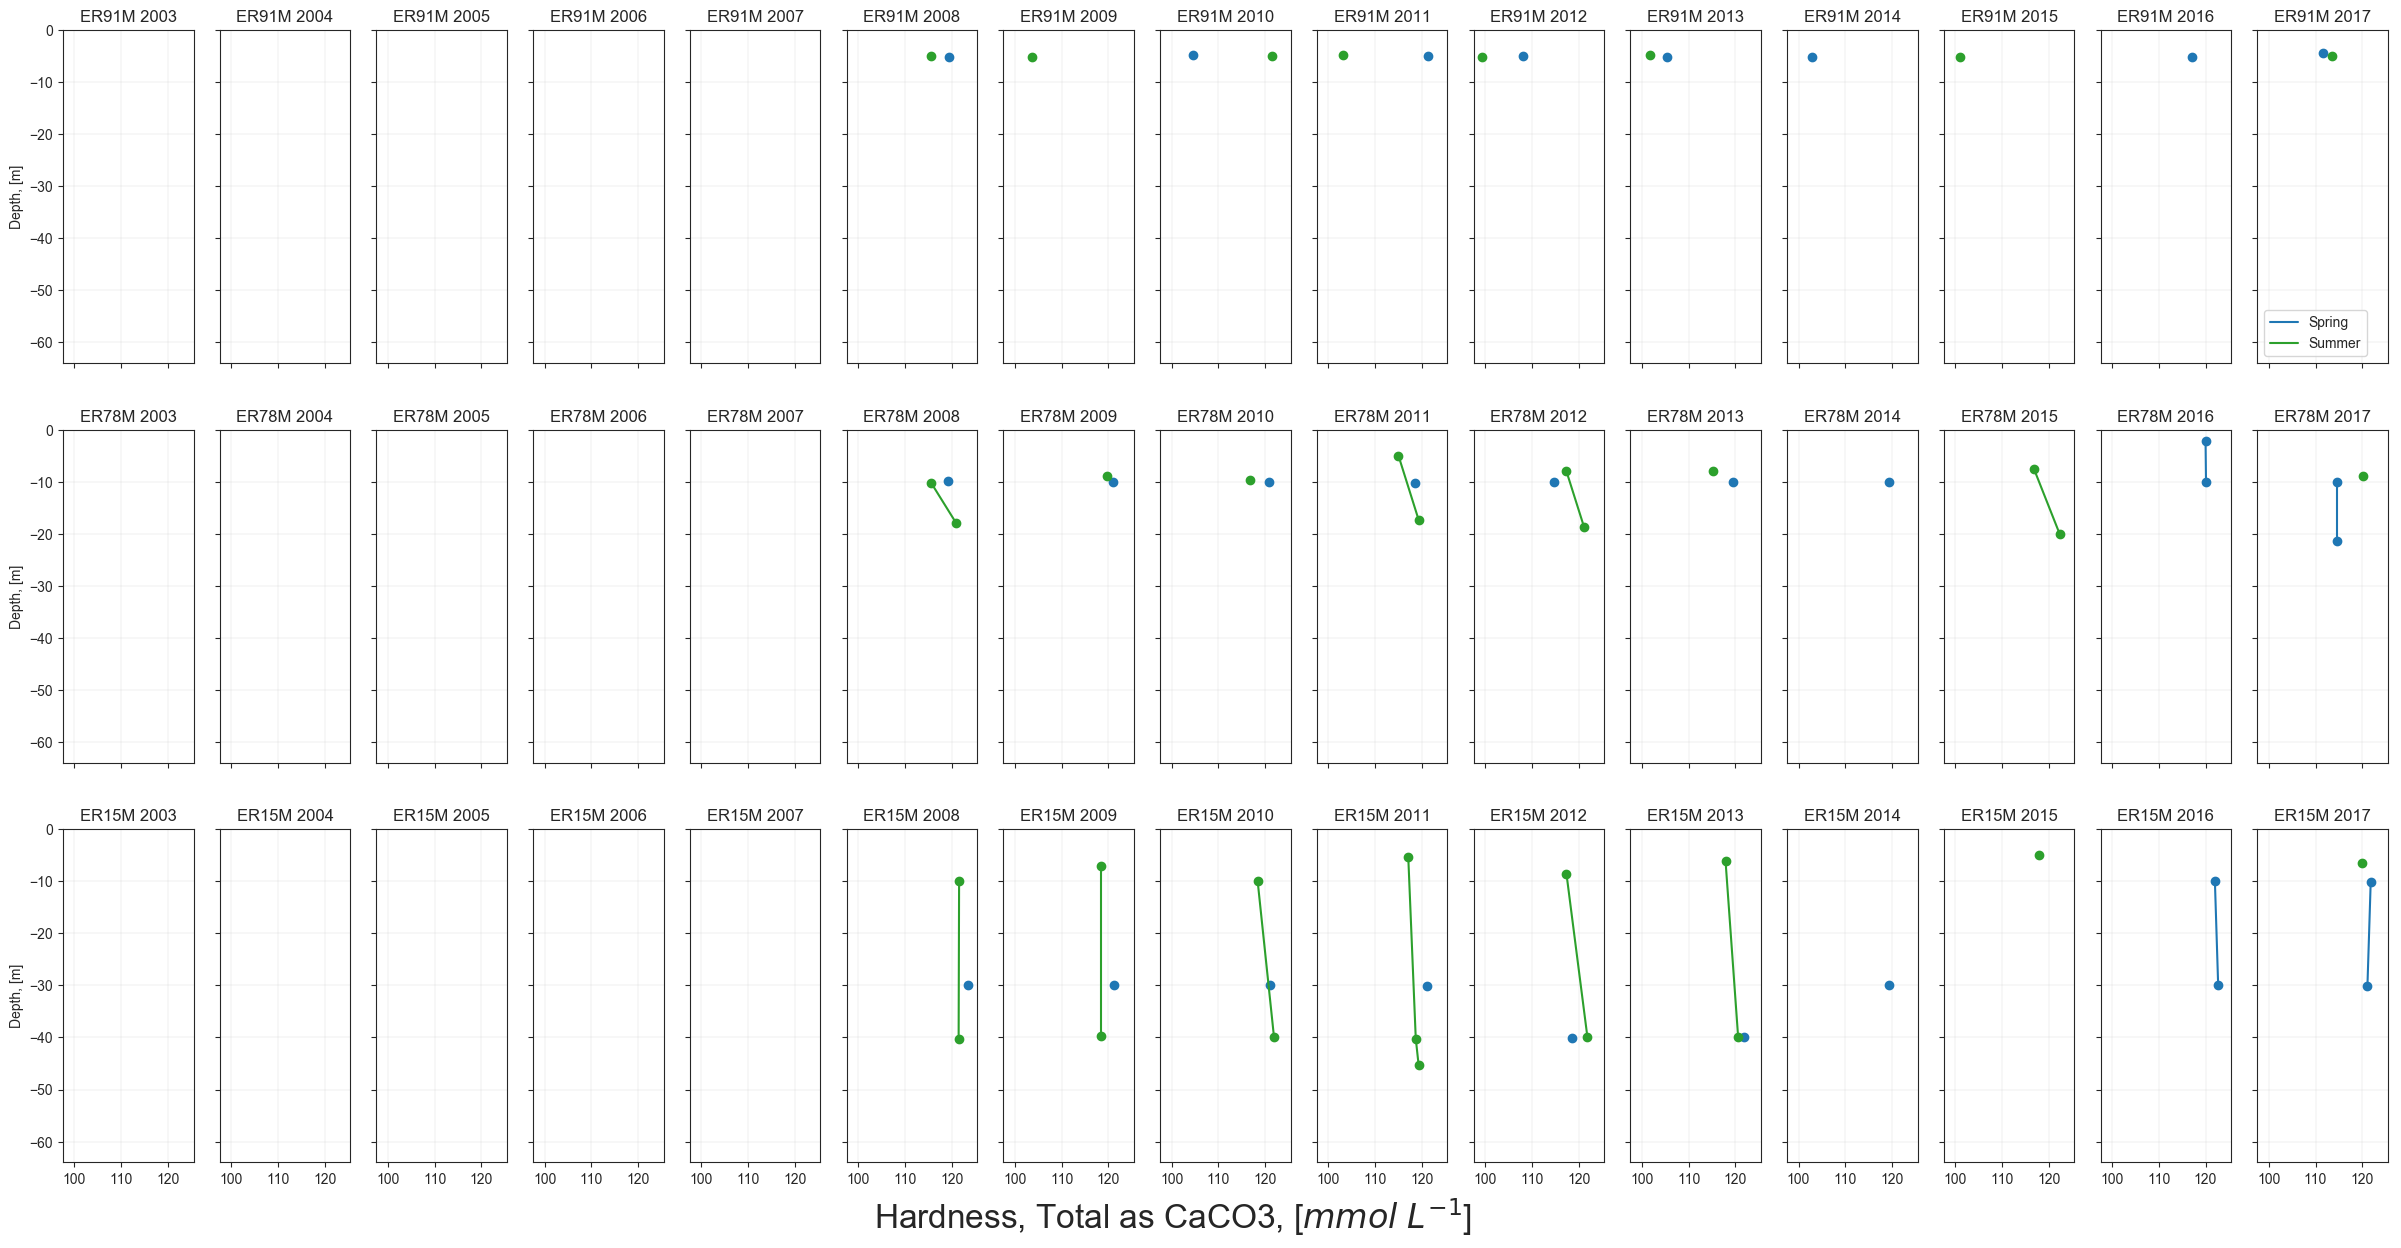

In [25]:
Hardness = pd.read_csv('../../measurements/GLNPO/Mass Balance/Hardness.csv')
Hardness = Hardness[Hardness.QC_TYPE=='routine field sample']
Hardness = Hardness[Hardness['STATION_ID'].isin(deep_stations)]
Hardness = Hardness[Hardness['STATION_ID'].isin(deep_stations)]
Hardness = Hardness[Hardness['SEASON'].isin(seasons)]
Hardness['VALUE_1'] = pd.to_numeric(Hardness['VALUE_1'], errors='coerce')
# Hardness = Hardness[Hardness['VALUE_1']>50]
Hardness = Hardness.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Hardness[(Hardness['STATION_ID']==st) & 
                      (Hardness['YEAR']==y) &
                    (Hardness['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
#             axes[i][j].set_xlim(0,2)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Hardness, Total as CaCO3, [$mmol$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/Hardness.pdf')